In [3]:
import pickle
import gzip
import numpy as np

# I am still ignoring K=200!!! 

In [133]:
# Looking at the logits that are outputted and analyzing them. 

prompt_wanted = 78

prompt_length = 100

vals_dict = {'tfs':[0.01 ] }

'''vals_dict = {'tfs':[None, 0.01, 0.05, 0.1, 0.5, 0.75 ],
'n': [0.1, 0.25, 0.5, 0.75, 0.9], 'k':[1,10,40,200]  }
'''

"vals_dict = {'tfs':[None, 0.01, 0.05, 0.1, 0.5, 0.75 ],\n'n': [0.1, 0.25, 0.5, 0.75, 0.9], 'k':[1,10,40,200]  }\n"

In [138]:
for key, params in vals_dict.items():
    for par in params:
        if par == 200:
            continue
        if par ==None:
            par = "None"
        all_logits = pickle.load( gzip.open('gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        rand_selects = pickle.load( gzip.open('gpt-2_output/prompt_rand_selections_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        break
    break

In [139]:
rand_selects

array([ 5139,  3768,  3912, 14879,  4848, 13605,  7192,  4237, 11121,
        1026,  8831,  8895,  9386,  8417, 10926, 12170,   689, 11198,
        5558, 14495,  9743,  3571, 10490, 15136, 14165,  5939,  1996,
        5117,  7427,  1754,  8566,  8908,  3902,  7495, 11357,  5927,
       14523,  7528, 11829, 12279, 14369,  3906,  3151,  9904,  9827,
       12211, 12933,  3498,  9235,  6581, 14304, 14487,  5428, 11345,
        7185, 10007,  5472,  4487,   540, 11144,  7012,  4381, 12873,
        7952,  2756, 11068, 15111,  6720, 10393,  3551, 14269, 12066,
        2866, 10860,  7183, 11955, 13936,  7243, 14593,  9269,  3369,
        9500,  2613,  1021,  3822,  7491,  9998,  6938,  1582,  7865,
        2662,  9045,  1324, 11431,  9123, 11092,  2847, 13290,   653,
        1838])

In [140]:
all_logits[0].shape

(25, 50257, 150)

In [150]:
# used to decode:
batch_size = 25
from decodeLogits import *
batch = prompt_wanted//batch_size
ind = prompt_wanted - batch*batch_size

print(batch, ind)

tokens = []
for time_point in range(all_logits[0].shape[2]):
    tokens.append(np.argmax(all_logits[batch][ind, :, time_point]))
decoder_text(tokens)

3 3


' lookill it my sy,, the sy, inject it to the sides sy and the sy. I\nI\n\nII the you doing?" I friend asks voice is from behind other side of \'s no a few seconds- shotsages in the building. and of ones and into from the other. aassable walls walls. ed by a more caveso-. varying caves.ided into a large of  few holeoape hangs in the head. a me to look back.  immediately, sound appears appear on my screen. "TheGERASS\' \n  I wake, I hear the theled screams from theNo what you have if time?" and a few seconds. before wake to optionute option.'

In [151]:
text[0].shape

(25, 250)

In [143]:


import encoder
model_name='345M'
models_dir='../gpt-2/models'
enc = encoder.get_encoder(model_name, models_dir)

prompts=pd.read_csv('test_dataframe_500primer.csv')

enc.encode('!')

[0]

In [144]:
choose_prompt =rand_selects[prompt_wanted]
choose_prompt

14593

In [145]:
prompts.iloc[choose_prompt].Prompt

"[WP] Write a story where the antagonist is doing something obviously horrible, but by the end of the story make me want to side with him over the good guy. \n **BOOM** \n \n **CRASH** \n \n I fall hard on the pavement. Taking a few seconds, I scramble to my feet, coughing smoke out of my lungs. The weapon is a few feet away. It ’ s a large syringe filled with a purple liquid. I pick it up and keep running. Suddenly, I hear an explosion behind me. I can ’ t help but turn around. \n \n Cataclysm is floating through the street towards me, fire and smoke trailing in his path. He has a wicked smile on his face. He raises a hand at me, and a bolt of lightning travels right by me. I stumble backwards and turn down a side street. Luckily, I knew these roads like the back of my hand. \n \n I grew up here in Lower Echelon. It ’ s where the scum of humanity come to die. But it is my home, and I wouldn ’ t trade it for anything. I was left here for dead as a child, but I survived, even flourished

In [146]:
prompts.iloc[choose_prompt].test_target

"**BOOM** \n \n **CRASH** \n \n I fall hard on the pavement. Taking a few seconds, I scramble to my feet, coughing smoke out of my lungs. The weapon is a few feet away. It ’ s a large syringe filled with a purple liquid. I pick it up and keep running. Suddenly, I hear an explosion behind me. I can ’ t help but turn around. \n \n Cataclysm is floating through the street towards me, fire and smoke trailing in his path. He has a wicked smile on his face. He raises a hand at me, and a bolt of lightning travels right by me. I stumble backwards and turn down a side street. Luckily, I knew these roads like the back of my hand. \n \n I grew up here in Lower Echelon. It ’ s where the scum of humanity come to die. But it is my home, and I wouldn ’ t trade it for anything. I was left here for dead as a child, but I survived, even flourished. Over the years, Echelon grew, and so did the population. The buildings became closer and higher until you couldn ’ t see the sky anymore. It got so bad that 

In [147]:
prompt_target_encoded = enc.encode(prompts.iloc[choose_prompt].Prompt)
target = prompt_target_encoded[prompt_length:] # encode and get the prompt length. The rest is the ground truth. 


In [148]:
decoder_text(target)

" pick it up and keep running. Suddenly, I hear an explosion behind me. I can ’ t help but turn around. \n \n Cataclysm is floating through the street towards me, fire and smoke trailing in his path. He has a wicked smile on his face. He raises a hand at me, and a bolt of lightning travels right by me. I stumble backwards and turn down a side street. Luckily, I knew these roads like the back of my hand. \n \n I grew up here in Lower Echelon. It ’ s where the scum of humanity come to die. But it is my home, and I wouldn ’ t trade it for anything. I was left here for dead as a child, but I survived, even flourished. Over the years, Echelon grew, and so did the population. The buildings became closer and higher until you couldn ’ t see the sky anymore. It got so bad that the police had to develop special helicopters to drop down officers and reinforcements. But recently, they have n't been doing much, not with their hero Cataclysm cleaning up the streets. \n \n I dash into a close buildin

In [158]:
enc.encode('dist')

[17080]

In [153]:
par

0.01

Prompt: 

[WP] Write a story where the antagonist is doing something obviously horrible, but by the end of the story make me want to side with him over the good guy. 
 **BOOM** 
 
 **CRASH** 
 
 I fall hard on the pavement. Taking a few seconds, I scramble to my feet, coughing smoke out of my lungs. The weapon is a few feet away. It ’ s a large syringe filled with a purple liquid. I

 
Generation: 
 
 distill through the glass base of the weapon and add liquid to both the weapon and the needle. 
 

"What were you thinking?" my girlfriend's voice comes from the other side. There are only a few close supporting anchor points in the building, several smaller caves cut off from each other with impassable metal wall. Followed by 3 smaller silo's of small holes voided with a wall. A small holotape plays in my hand, causing myself to fall asleep. Almost immediately the message will appear on my HUD, 'BUGGRHE!) 
As I sleep, I hear only muffled protests of "but do you mind wasting blood?" for a

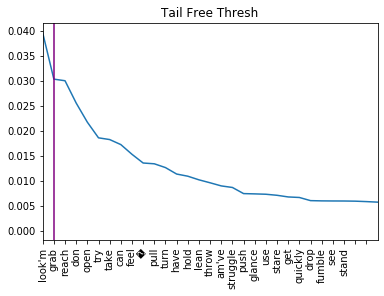

(array([16232]),)
 look'm grab reach don open try take can feel � pull turn have hold lean throw am've struggle push glance use stare get quickly drop fumble see stand raise scream press run pick roll think slowly put grasp step need jump let catch gasp carefully climb draw stumble slide want do shoot place swallow move watch aim wonder cough spin twist lift * hit rush give grit know flick guess make stop toss blink fall close stab manage lun sit shove start realize swing immediately breathe� hesitate  remember find grip smile w inh flip shake almost thrust yell walk kick laugh p keep bite win fl hope rub strain slam brace'd attempt y crou go bend wrap sh squ lie dive was point hear could crawl seize must instinctively cry barely scramble punch begin shout cover tilt notice smell h ask spit touch wait swear dodge remove collapse break recognize check squeeze lose tap sink drag release cr pe examine vomit call shift read pause poke grow leap just kne recoil t wipe strike rise tell pop k

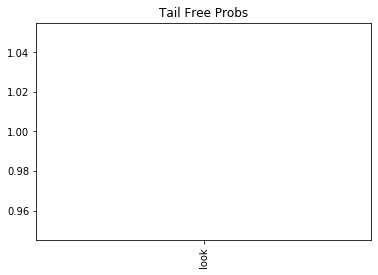

words in order  look
target word  it
tail value 2
target index 472


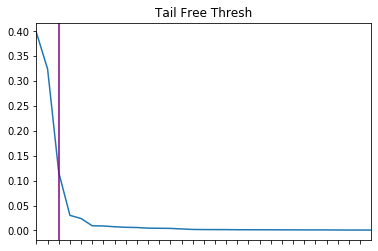

(array([10698]),)
illantlyendasteilendedastantractortalenseributeancedubressillationishulseoseingurubopillingortingallyancingeneingemrackaffributesententionininctuckroellensionurowale-aceinceumpenchentlyroriveomendingurbrictinchossebortionensroyinquimbendsontILLorbressingointassecilledribourackemptractedouchainictractionraceumeestuffyapeobanceearedancangleolctopenedlyorraughtricennomeopianathatherociateomaticempunctizzleugaintareussropillsistolveruptulouslyonefarbuneillerickccensibleaccaintainalgululsortsinkreogigounceileuselyibocateensiveishlyablyealulsiveorientunepripirlobarilleryrilelrbegantedilatedinklelateaillaountantsurbedarilyasurgakortedomedidnapushinteg,inguishedorteructatchathomoberofolliss'ablerateultraginc


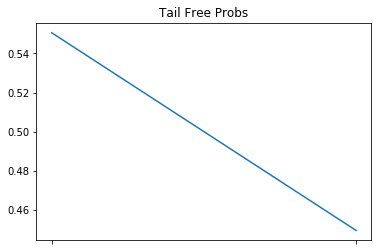

words in order illantly
target word  up
tail value 2
target index 44


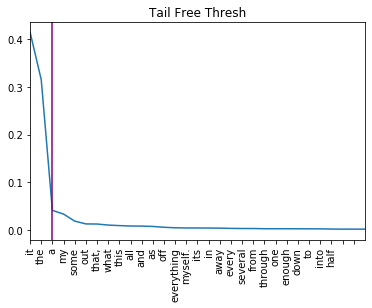

(array([21020]),)
 it the a my some out that, what this all and as off everything myself. its in away every several from through one enough down to into half another an with two blood about more for on just most three something them up any his water at back over slowly each  both by whatever quickly those part before me almost how I first carefully , nearly around their using again 1 five until after her mine much ( him .:  four these liquid of 2 right anything so air your many roughly though when exactly while against too small nothing- only our six immediately or quite [ within itself slightly juice gas… then rapidly however between 3 ten/ red - once there pain – inside very where 5 alcohol twice which... tears; under hot—
 * " onto even like completely fluid things not The furiously further but well various if 10 no ' said fresh along seconds clean straight everyone less little yet deeply thoroughly pure milk 4 heavily parts without 100 certain & / blue violently towards now cold fa

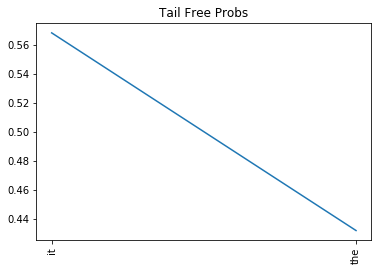

words in order  it the
target word  and
tail value 2
target index 60


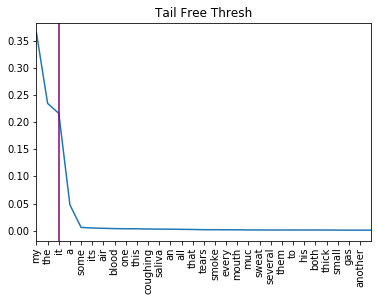

(array([28083]),)
 my the it a some its air blood one this coughing saliva an all that tears smoke every mouth muc sweat several them to his both thick small gas another water what each breath fingers two vomit teeth myself spit cough other clenched grit, glass pain half more sheer I various me tiny out so dust muscle your their and breathing oxygen red sand ch. gr with everything straw whatever something paper any our bits bubbles time thin tissue g urine liquid gau mine her these those many there cr nose fear cotton mud p enough as hand m foam little multiple in wet dirt whe hot plastic tooth words [ broken skin duct veins chunks fog about wind ear much t lungs r dry coffee most three f him hair cold open different sp pieces pure dro fist cracks fire spl black l lung cigarette inhal ice s st bloody em throat contact just ash hands almost food heat nost eyes compressed large fluid inh layers smaller nothing use white w space breaths pockets sl sy burning  back bit trash grape flames s

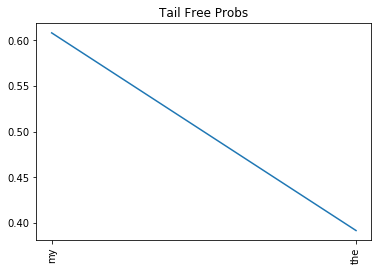

words in order  my the
target word  keep
tail value 1
target index 3562


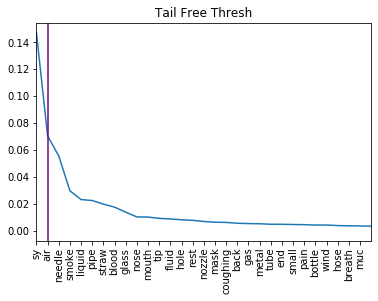

(array([35095]),)
 sy air needle smoke liquid pipe straw blood glass nose mouth tip fluid hole rest nozzle mask coughing back gas metal tube end small pain bottle wind hose breath muc vomit lens barrel window cough filter g gun weapon inhal empty substance crack wall blade wound skin veins mist teeth needles lungs st corner contents dro black tiny spray fingers remainder tears plastic cigarette thin p haze sl nost thick cap fog dust top powder floor water gau sm sticky nasal device hair fabric stream broken little fumes spit throat paper funnel red open bullet knife bag cloud piece fire f pipes visc v mixture smell burning screen other front sp tissue darkness side opening last bloody vein instrument rag neck flame flames vis saliva walls handle s flow night edge m middle plun c stomach white w cylinder r container cr pump drug remaining first wet vapor dirt tubing sleeve eyes spl hand holes lung object machine cloth corners waste material mess IV purple thread rubber use entire hollow

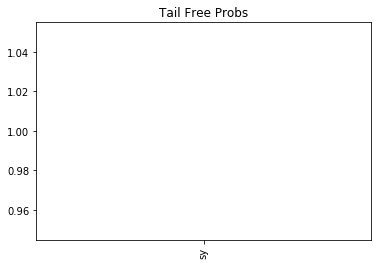

words in order  sy
target word  running
tail value 2
target index 811


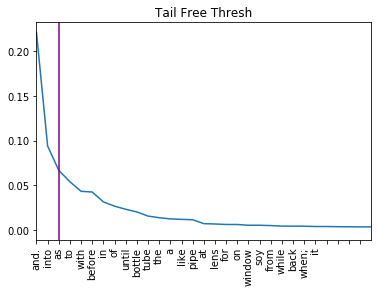

(array([19017]),)
, and. into as to with before in of until bottle tube the a like pipe at lens for on window soy from while back when; it between shards towards that over onto around container slowly needle- glass filter mouth by v jar several toward: nozzle using then just about screen again sl one after - eyes handle first tubing top cap up – I barrel carefully through casing down half off , inside all ( bottles my against sy under once what f case's eye flask cup but lid till frame piece an cylindered tubes along pipes bowl out tip . — this filled cover its opening where tank covering without windows quickly behind face almost rod � plate some two door three hole— pip tightly nearly across right holding or dispens chamber gentlyware lenses cage looking panel which pane nose next mirror s how now enough blade not only mask during more p repeatedly tool slightly cleaner pan side another  sh trying capsule halfway away g glasses " sleeve within briefly wall because gl neck grate funne

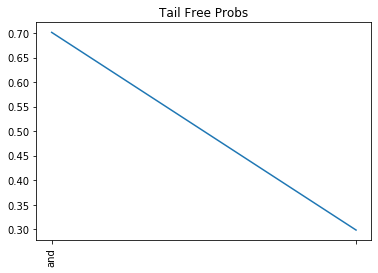

words in order , and
target word .
tail value 4
target index 3


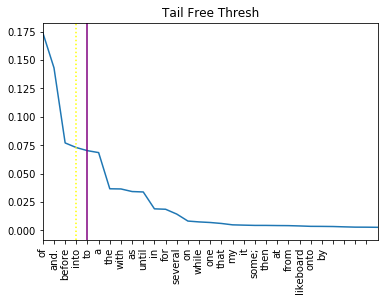

(array([15743]),)
, of and. before into to a the with as until in for several on while one that my it some; then at from likeboard onto by over when I using three what � all an between so: first ( after two – about this through inside off where every towards - its within , out just along- without down which once againstplate slowly away up plate carefully around layer but under quickly back . trying till each holding — myself— half making…– next twice toward four more five almost containing " right nearly near again how upon part there anotherboards … if piece something's behind everything leaving during only or� across immediately glass his ten."  six slightly & itself  below any
 because... beneath even above completely many though material whilst causing covering instead enough [.[ underneath very filled top notpiece coat prior rapidly creating board long twenty 3 separating faster--- 1 attached directly/ roughly * he multiple covered however leftcoat cap tube too tightly going past

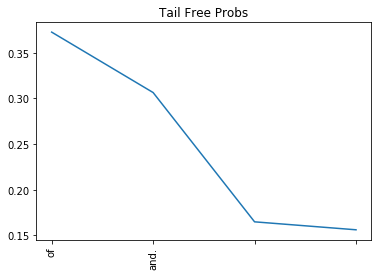

words in order , of and.
target word  Suddenly
tail value 1
target index 18408


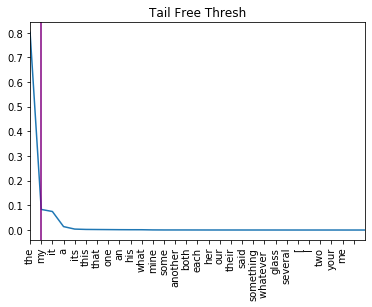

(array([38016]),)
 the my it a its this that one an his what mine some another both each her our their said something whatever  glass several [ I two your me  every � him such ​ gun My how all SCP glasses The and those which them everything tha ., to… hand   these knife Mr any shotgun half there either sy ' three Glass top th weapon " bottle Dr various small where … just things […] It blood myself R plastic other most
 G withthe about... someone many S C water M Crescent ­ paper not bin more ( metal at as c eye O large why. P� broken John course- < contact light high phone K almost s air F T gravity t barrel B f m in V Sy camera for E part p thick pistol Cas lens of rifle █­ four nearly W cover ... needle Hope goggles head mask J heavy L only ch he case pen bottles from w g no A Black Y car v 1 Kle five note MY is H D bar Q # when on six sight pipe pocket gloves


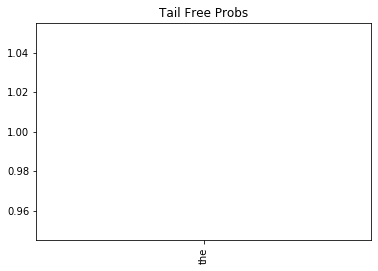

words in order  the
target word ,
tail value 1
target index 302


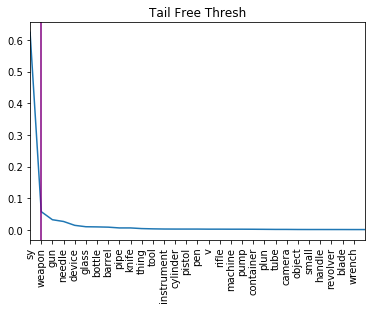

(array([39530]),)
 sy weapon gun needle device glass bottle barrel pipe knife thing tool instrument cylinder pistol pen v rifle machine pump container plun tube camera object small handle revolver blade wrench lens flask inject firearm nozzle mask spoon dispens contra hammer cap metal Sy window mirror bullet plastic arm shotgun large blaster scope phone drug tank box toy handgun black launcher ph hand straw bag blunt end jar helmet door s d dart prop case dagger amp air frame top tip broken spear can table little funnel piece grenade g cup staff sc razor screw counter . safe c makeshift head p cartridge pip sp clip car wand hook remote vehicle silver bar magn empty key med injection hood back medicine vest tiny glove one needles neck nose bomb item ball spray chamber screen rod liquid gas fork  light receiver ring h cross vis skull holder st ' IV " implement l bin cann m apparatus chair casing other medical cane sword terminal V butt wooden magazine  unit spike base truck shell cr sil 

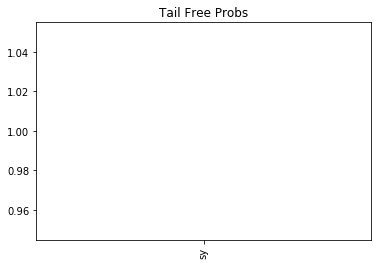

words in order  sy
target word  I
tail value 2
target index 53


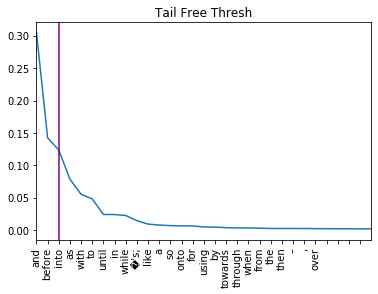

(array([20582]),)
,. and before into as with to until in while �'s; like a so onto for using by towards through when from the then – , over just: that at on slowly quickly - ( back but several after without against carefully toward down . itself up one- I — again which first between once� out till almost right along of only it—…– my slightly  about
 making holding … every all where --- more twice trying inside under whilst leaving immediately two during because some within repeatedly an three  causing though completely rapidly enough now or looking instead." carrying away too even * nearly--- what... around behind − " & fully if next this––! off well across violently much many.[ very -- briefly perfectly being not ― myself ; gentlyís-- roughly faster straight its however near allowing long quite   exactly prior another via― ­ : such above giving somehow � later reaching directly ** ... past half creating fast each how……�.. > easily you he ' knife upon we is…. most since shortly [


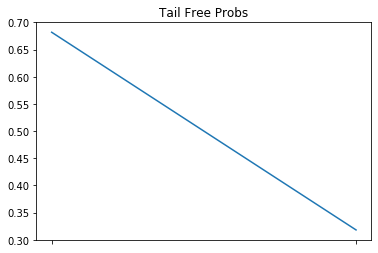

words in order ,.
target word  hear
tail value 1
target index 1222


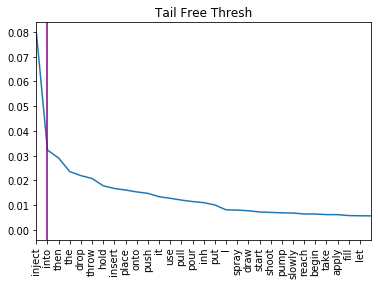

(array([23033]),)
 inject into then the drop throw hold insert place onto push it use pull pour inh put I spray draw start shoot pump slowly reach begin take apply fill let squeeze back toss spit grab out get, drink make try dump a my rub add press carefully give run swallow suck release turn dip shove open set remove look slap mix through hit spl send move scrape stab pick stick slide quickly clean vomit tap tie wrap dab administer blow sl hand attach fire aim watch collect force down pop strike sm wipe find deposit its bring leave feed pass p stare lay roll load squ catch strain smear in scoop am keep extract spill carry lean lift sink coat head rush light twist bury transfer close g blast work immediately go lick smack drag empty stand crack rinse deliver discard refill finally feel replace breathe cough focus hope up shake flick smash with attempt crush slip slam finish cut thrust st snap grip sip t save clip gently wait withdraw pipe walk paste punch smoke to sit plug over drib fi

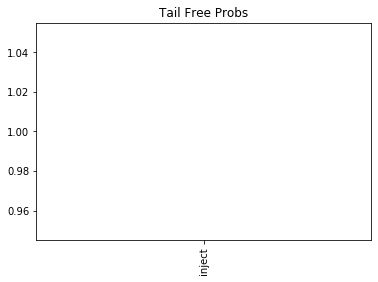

words in order  inject
target word  an
tail value 2
target index 9


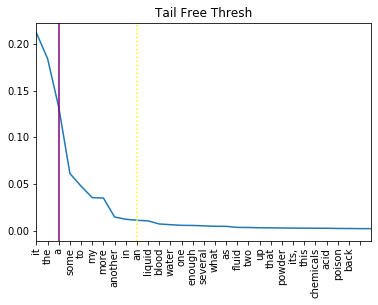

(array([17349]),)
 it the a some to my more another in an liquid blood water one enough several what as fluid two up that powder its, this chemicals acid poison back into something gas all other myself just small whatever oxygen salt about any. them powdered juice three pure fuel on air red  extra even alcohol with half liquids ether at additional gasoline white black various pressure ingredients his much ice fresh drugs drops green part less sy saliva only c fluids cyan both pain smoke color yet most venom of 1 v five s dust hot each further everything o four heat out sugar every ammonia bleach anything chemical t cold oil ink muscle g for boiling tiny " concentrated power new heroin nit f onto I syrup many  weight fire nicotine crushed shards 2 am urine large acet and adrenaline over carbon gel l blue sl ethanol no- vapor until glue sodium gun electricity nearly spl morphine milk potassium pieces their bits parts little toxic m him gelatin nothing almost petrol so pepper purple st gl

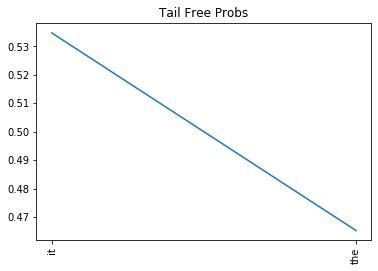

words in order  it the
target word  explosion
tail value 1
target index 2886


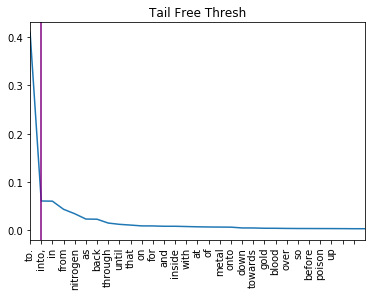

(array([20690]),)
 to. into, in from nitrogen as back through until that on for and inside with at of metal onto down towards gold blood over so before poison up directly black acid slowly around meth silver out pressure- across enough dro white again heroin blue the like human toward gas when powder I liquid just by material solution mercury while oxygen fuel chemicals it cyan mixture contents spray about my matter red magic phosphorus between green residue more within – containing sl under nicotine only substance a paint form latex drops fluid purple chlorine  filled every spl orange all venom myself quickly straight █ which fire; morphine or but bleach nit ( glass without vapor v oncey shards medicine glue one: — - lead where.[ water first gun paste via some behind smoke ingredients rubber p crystal ammonia di… potassium drugs muscle later particles pain j tissue gelatin ice juiceized he if right carbon per wherever prop dye hydrogen
 sh using gel along pure mag samples based sy sug

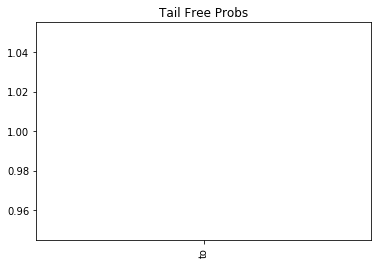

words in order  to
target word  behind
tail value 1
target index 2583


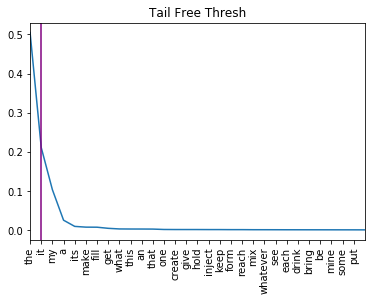

(array([27870]),)
 the it my a its make fill get what this an that one create give hold inject keep form reach mix whatever see each drink bring be mine some put help pour take myself another try both replace draw taste liquid shoot clean empty cover extract turn find feed any finish ensure produce where water fix build place compensate stop push two do I his achieve spray start all refill drop me increase fluid let dry add match catch prevent spread clear either go remove just our use their slowly wash spit recover to several thin squeeze every dissolve avoid shake them check wet throw balance begin blood pull set slow continue blend scrape hot allow top various open glass work fire activate break change simulate something adjust grab test raise press everything blow poison inh your rub powder, small force tap how warm re dil read kill equal sy pump fuel expand complete hit breathe replen drip counteract run quickly obtain  gas maintain hand save light imb other contact gauge and spl 

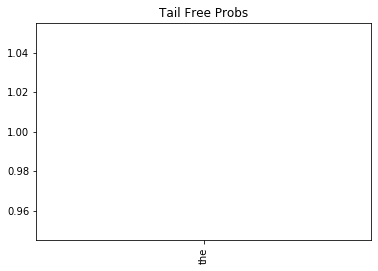

words in order  the
target word  me
tail value 2
target index 35


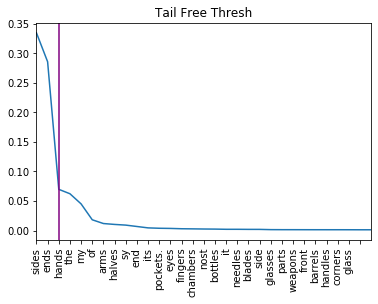

(array([35629]),)
 sides ends hands the my of arms halves sy end its pockets. eyes fingers chambers nost bottles it needles blades side glasses parts weapons front barrels handles corners glass pieces, sp needle a me edges pipes inject cheeks hand sl legs I s g myself fists p gloves holes caps cartridges cylinders containers tips knives v f tools inside in lenses top veins bottom points surfaces lungs to cap faces walls fl gas arm guns empty pumps pens forks and bott liquid lips mouths cups their shoulders our base pip objects cases open mouth instruments cas with l his m teeth that ut weapon before r air devices at hem bullets shards bodies gau fronts cr this tubes al metal outside an channels other o upper ears rounds up small gun bl windows c . liquids reservoirs comp plastic wells throats horns d pistols wounds mine "- straw wrists t n blood as for sticks drinks axes drops ch on tabs water handle b your joints feet pr cl pipe wheels these directions openings h S filters banks pump 

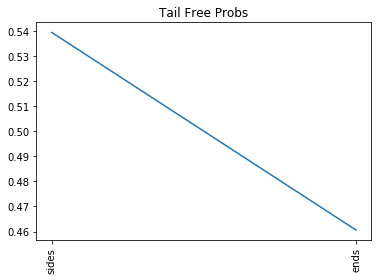

words in order  sides ends
target word .
tail value 1
target index 1233


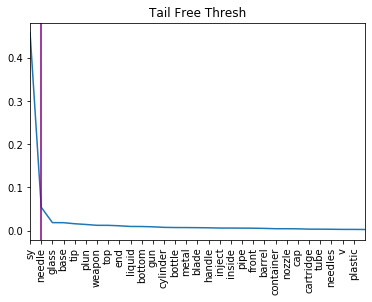

(array([41190]),)
 sy needle glass base tip plun weapon top end liquid bottom gun cylinder bottle metal blade handle inject inside pipe front barrel container nozzle cap cartridge tube needles v plastic outside chamber powder back center sides black knife blood empty arm pump main side blunt neck bullet ends air mouth body injection upper fluid head small gas projectile silver core opening spoon middle shot spray lid red g first white blue surface shell tool nose ground bag straw wound rubber flask object funnel ball trigger cup pistol poison target large device frame grip pen sp stock purple hand rifle interior left inner casing right central other h final contents substance pip sl " blades primary hollow clear p floor bowl open tank victim bullets lens hose ammunition capsule drug edge instrument paint rim camera tips filling steel throat ceiling cann point s dart ring sharp hands skin firearm piece outer pink sample rest original hole water tubing cold shotgun user stem hammer long 

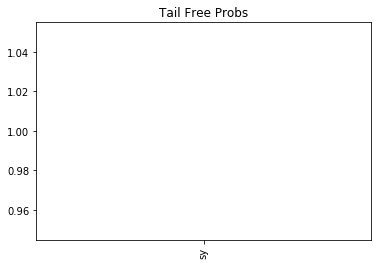

words in order  sy
target word  I
tail value 1
target index 41


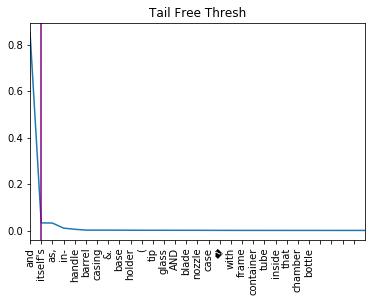

(array([38252]),)
 and itself's as, in- handle barrel casing &. base holder ( tip glass AND blade nozzle case � with frame container tube inside that chamber bottle arm core + at end to shell sleeve of cartridge attachment I p side body� hand cylinder sy bottom grip pump it tank/ on cas before head the filler from for top part whenís pocket cover portion is  knife or mouth skin by but piece like lid cap
 sl – stem blades s along box insert g handles cup capsule bag while socket neck feed surface inject a back sh slot– once clip - parts she liquid(� plate pouch needle form h kit up grips housing too . front chest flask being you… holding lens b also gun " metal then envelope plus already section c system stock , face pack [ powder —blade tool ink … buffer herself n can so through just sp ring compartment mass tips gl design mesh he plastic steel mechanism now hole behind first plun l which rod shape bar we where ends my  barrels material v above fluid pieces belt was:


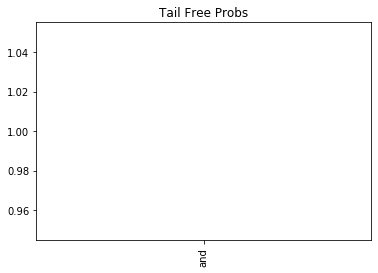

words in order  and
target word  can
tail value 1
target index 382


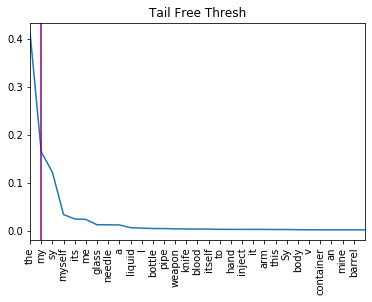

(array([33871]),)
 the my sy myself its me glass needle a liquid I bottle pipe weapon knife blood itself to hand inject it arm this Sy body v container an mine barrel mouth any other what neck gun fluid their some spoon mask ammunition in cylinder one blade needles nozzle air patient cup throat all his both camera nose drug base poison water victim pocket another small back glove your that flask tool hands ground eye substance whatever device metal head bullet lens with injection finger medicine inside plate top those into instrument plun side drink tube on IV empty tank, cartridge glasses gas lid each funnel jar skin ammo powder p s handle of sleeve cap fingers shield bottom rifle spray front then shoulder user straw target bottles object V pump floor backpack bag nearby surrounding two tip amp helmet dagger My equipment vehicle pen vest black staff counter from contents car bucket gloves saline plastic chest armor bullets eyes at piece drugs fork filling spl "  l our face end g sl sy

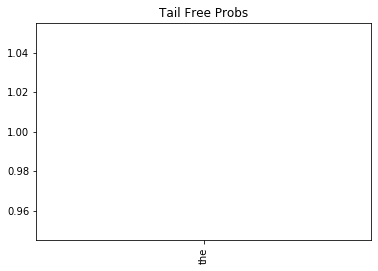

words in order  the
target word  �
tail value 1
target index 10397


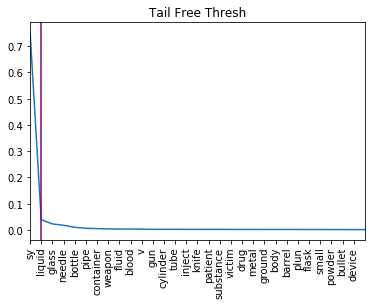

(array([36090]),)
 sy liquid glass needle bottle pipe container weapon fluid blood v gun cylinder tube inject knife patient substance victim drug metal ground body barrel plun flask small powder bullet device Sy tip poison injection object arm empty other air base tank plastic black person blade purple end user gas floor shot rest contents ammunition cup drink needles neck straw syrup top target mask blue pump handle spray water solution cap nozzle hand table back piece jar funnel inside bottom front camera saline silver p medicine wound amp skin side g ceiling source lens red large bag vehicle projectile spoon sample cartridge window hose surface stream tool plasma plate mouth ball tubing can liquids pocket main green " h throat shell dro rubber instrument nose c bucket vein sleeve drugs smaller vessel sl staff wall surrounding girl s screen white mixture child pus bottles safe chamber casing potion machine counter smoke center stock man subject crystal filling acid platform pink lid 

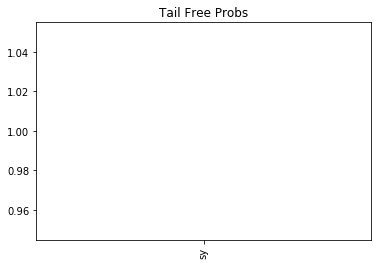

words in order  sy
target word �
tail value 1
target index 34611


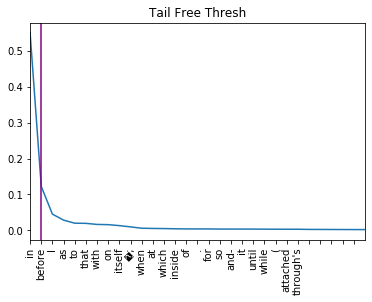

(array([29911]),)
., in before I as to that with on itself �; when at which inside of . for so and- it until while ( attached through's into tip from – without using: used by within
 the– where - after my along… protr ,/ just myself attachment like over above  directly he then below — between holder behind they during holding—." being  nose inserted base under inject needle blade right once.. near − wound hole a via sy set... you onto� making sticking stuck underneath … end dangling.[ back if next ― head --- point   slot we slowly ---- around embedded pointing running pointed me she towards again connected–– because outside going instead lying manually placed bottle filled device sitting bag causing every frame i out…. all.� or " this there( wrapped covered but immediately gun / line up [ hook about made It nest! down--- edge left― cap insert socket carefully � one whenever tied hanging form side upon prior ring across mechanism tipshole points only feed hidden top applic� filling thou

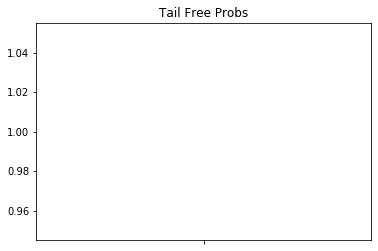

words in order .
target word  t
tail value 2
target index 913


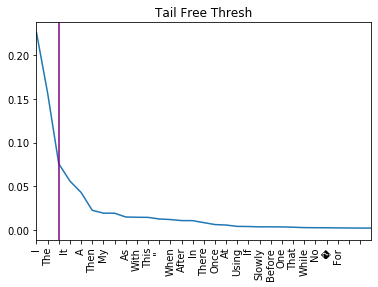

(array([21248]),)
 I The  It
 A Then My   As With This "  When After In There Once At Using If Slowly Before One That While No � For Taking * By All To From Blood Now Not They Holding An Finally Just Inst Within What Its Even Both We He Two [ Without Another On P And ( Sm Suddenly Next Immediately Like Pull

 Quick --- the Some Each St C F But Nothing
  Soon ** Over Re You < Looking . W<|endoftext|> Since Though � Everything ... Every Sh More Water Although Still Only << Bl Gl my Something Sl G Grab L Putting D Making How Cl So Fl Again T Breat Let S Despite However Through - B Light Under Because Almost Red Several     Dro Seconds Un Inside *** Upon Turning Time Oh Standing Sc First Doing Running Th H Swe These Unfortunately V Ref ' About Cr M Most Sw Pain Right Br Use N Add Satisf Three Moments Eyes Make Somehow Behind Feeling Having '' Hold E Smoke Take Tears Press Liquid Black Sometimes Don Other Cut She Yes Wh Maybe R Put O ~ Or Perfect Is Getting


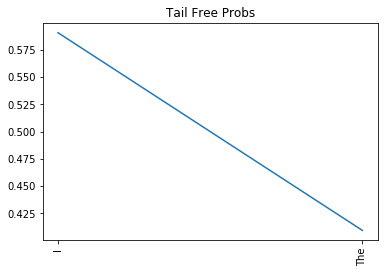

words in order  I The
target word  help
tail value 1
target index 11403


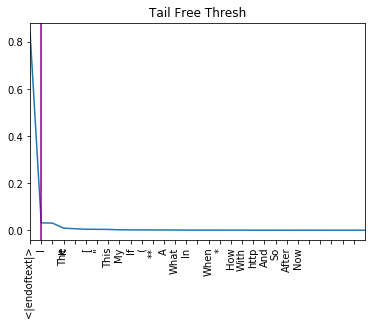

(array([27725]),)

  <|endoftext|> I  
  The It

 [ " This My If ( ** A What In    When * How With http And So After Now     They Why That � There ---------------------------------------------------------------- As All P We Post He ~ For Everyone . You *** W - One Where Let While An To Part ___________________________________________________________________ Can Just   ****________________________________ By __ < \Â Do Continue Edit Then Even F { Every Written________ Note More Is ​ At Like <<     Follow Good Ow Don Also Write Here Setting 1~~~~~~~~ >>> D UPDATE Once Put Two Never ' Because Update 2 Chapter" On Its Give Notes_____ O Any / No Fair , S Make Not Okay Read Well         Wh From But Hey R Roll Check my Sw Anyone [[ Oh Get https Please Some, Review Another Last Share Inst � Thanks Sc Cut -------------------------------- See Click Blood Both Leave G EDIT : Close """ Was Press Watch Keep M Instant Proof 「 Although # B Finally Care Less the Back Half About Free Before TheseI.-   

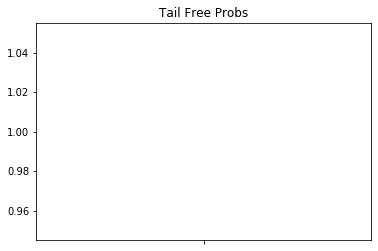

words in order 

target word  but
tail value 2
target index 2194


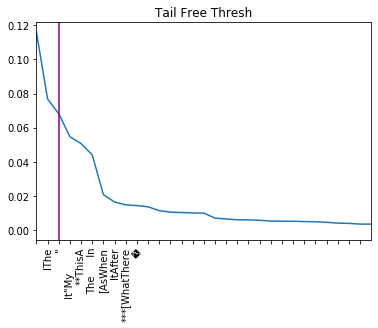

(array([13474]),)
I
   IThe "  It"My         **ThisA The      In [AsWhen ItAfter ***[WhatThere �AtThat�ThenNowWith My (S ThisIfAndSo *** A                Once(OnePForNextWhileWTOnCFTo
 FromHere***NoBut    As After   BeforeOhB<|endoftext|>H **** InYou <「WeD WhenAllSuddenlyTwoNotGJust Then 'TheyMO* IfL WhatByHowEvenHe That There WithAnother     WBO SoLikeKUnder One†St1ShAnN�Okay\ItsTHEIIFirstWellRSome''E And~ NowWhy ---UsingJInsideRead NoBloodSmIs theLetPain AtHeyYes,Second2Im.EveryDo​ReVSinceWithoutOf BeforePartOverFinallyCr P OnPosted                 While""Roll        U-Time ~Within To OnceHoldTaking AllThanks BloodWater ForSlowSomethingTake<§ They ButBecause HeThrough


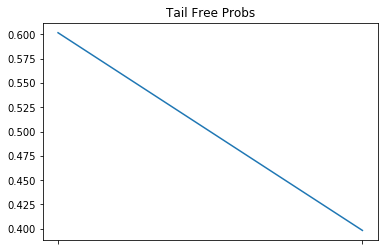

words in order I

target word  turn
tail value 1
target index 8058


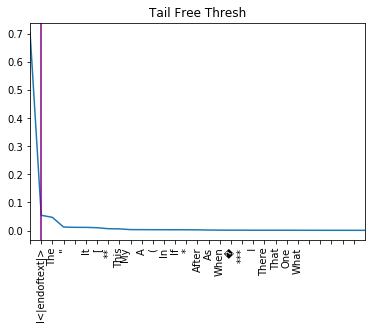

(array([22855]),)

  I<|endoftext|> The "    It [ ** This My
  A ( In If * After As When � ***   I There That One What You

 < They He We With So To And Now - How W P At While Then    "     . No For B On Not http '- Another         Before Like ~ **** Oh Two __ i / \ F Even An 1 By THE C Here All , H --- Do ___   O : Why From Once Is D But Let T L 2 M the See Some Everyone First #The Post Blood U << Can Just ... ​ Y Written None my Write Where Hey ^ G Edit, Wow { S Yes � Watch    _ Because Next Yeah Both K > R CR Get Something E Note         Well Nothing Despite Since: ) Its Back a it Un                 Ow � She 3 Other These + Don Continue Right Good UPDATE More Video Every Still Over Again X Any ThanksIt >>> Am People GreatA Out ; Okay '' Looks Man [[ Although Someone. | PH Without …


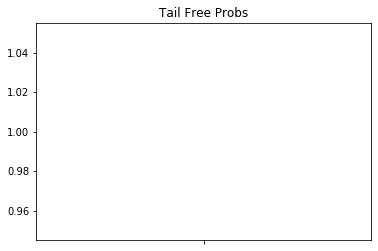

words in order 

target word  around
tail value 2
target index 7237


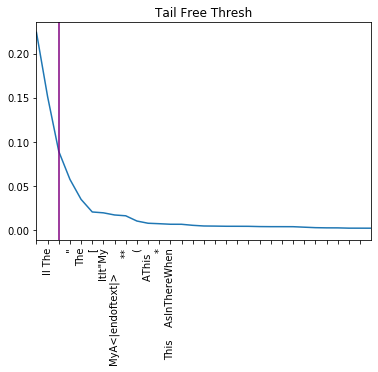

(array([19765]),)

  II The   " The [ ItIt"My MyA<|endoftext|>         ** ( AThis   * This    AsInThereWhen[
  As � In < WhenThatAfter ThereAt *** That After IfWith(        One NoWhat With THE** the ****IfThen Then   And WhatS WOne HeTWe At So We And --- mySuddenly 'NoForNowCBefore BloodTo BeforeSoHe All C TheyButOnceWhileP                �All Now PFromOnW ToNot ForB NotDThey ButTwo ~ Oh ...HOhJust 1 i On~ While \MTHE T F, .You [[Even AnotherAnother Just O By _ OnceNext DHere H CR「 MF*** YouBO EvenO -L\R         a From Two BByK Yes*.

 Like-​ HowG Every <<AnLikeWithoutII AnFirst itEvery First httpIts 2 SE LU �                 # U HereWell Finally SuddenlyHow Next


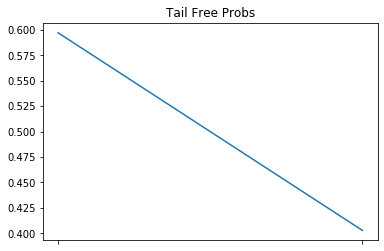

words in order 
 
target word .
tail value 1
target index 117


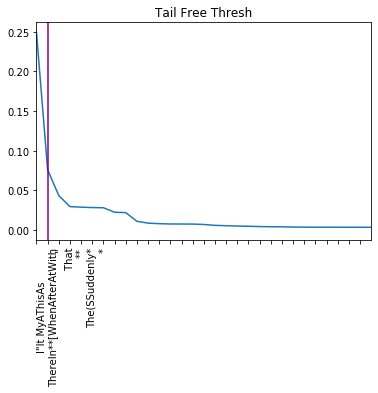

(array([10570]),)
IThe  I"It MyAThisAs
ThereIn**[WhenAfterAtWith "  That ** The(SSuddenly* *WhatNoAnd***If�THe [PCBOneWe    ForWBeforeAllF        OhThenButOWhileNow ItDOnFromH  ''NotToTheyTHEOnce​So MyByYouJustTwoMBOL~An (EvenRAnother-ImUELike�KTimeWithoutNext「G ASomeIIHowHere �NItsSomething<THSh <'...BloodStNothingSlowSm.,IsFinallyPain ***---EveryThJ ---Why__""CrHoldYesWell****CRMaybeWithinFirst†UsingYSince<|endoftext|>AhSurUnderTakingMoreV ThisUn theAgainInsideDoStill   1ReLookingLetRAWHisThroughEverything~~Both[[OverChOfZRoll<<:Mom_ ****She#theÂBecause ...BlThreePartSp .\TheseOnlySomeone�AN________FlDespite


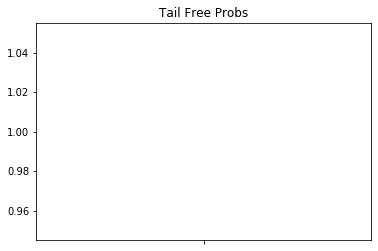

words in order I
target word  
tail value 1
target index 55


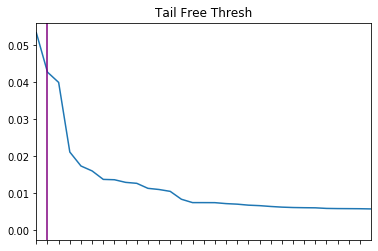

(array([7534]),)
IWhatYouOhItThisNoAHeyOThatHTheHowFuckAhWhyDoUGDonWhoGoodShGetIsBSPWeSoThereNowWellStopCWPleaseWhDMFHe IMyAreLetNHereTIfCanThank Y TakeEWhereYesHoldHolyKComeNotJustHelloLOkay WhatDidYourLook YouThanksWaitUhGiveDamnStGoHuhWHATAndBloodRKillAlrightHa *ButJBeWowThNicePutTheySorryOneNOSeeForOHVIn
 ItAllDrYOUSTStay OhYeahHiBlHEGot ThisTHKeepHmmSheTimeSc  HaveDamImpMrWoHelp NoDoesGreat TheWhenGETAs .RunAnUmUnWHEhZDieChBrWatch ...ArVeryYoGodMissAAAAOK ThatAwCareWasPoLooksSm … ,TooJesusExcToPullSpTellTHISTHE HowTwoTrySHCr "SirQuickWHOLeaveEasyBOQuMoreAtCal DonPot GetSlITAAAAAAAA


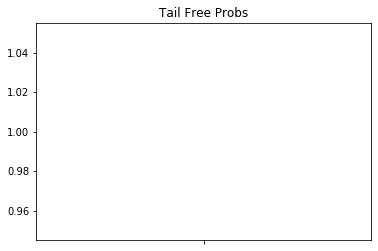

words in order I
target word 

tail value 4
target index 149


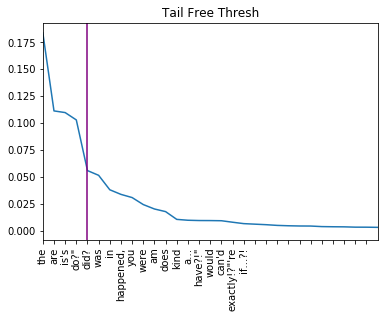

(array([14735]),)
 the are is's do?" did? was in happened, you were am does kind a… have?!" would can'd exactly!?"'re if...?! about else should now," has on will could!? � I.…" d just."!?", makes-!" an"-"..." it happens we for …?? sort this color to  shall your had type�—the made up part of took time gives –'ve.. he went that ''m'll� ever--?' ... more…. they and goodin must right weapon—" all brings ?ís * s– happen what The--- next at - with´ ya tha", really i kinda??? other ,…… [ use again fucking smell got bloody...? shit: goes better  looks?」 my caused~
 little gave way!! " came so'?". actually didn make piece don.... isn as look THE might . IS brought o seems shot need hit!!" when one me….. art ha kinds means out from drug � she …"; — there or no fuckin say


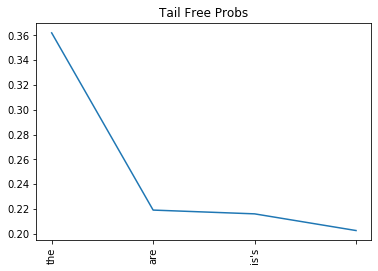

words in order  the are is's
target word  
tail value 1
target index 49


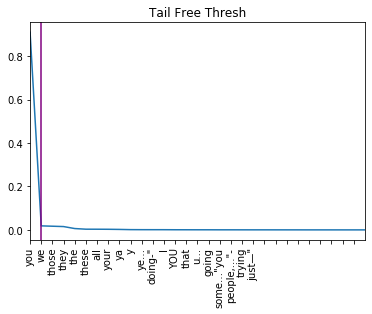

(array([24119]),)
 you we those they the these all your ya y ye… doing-" I YOU that u... going some…"you people,..."- trying just—" there yo—--?" my You he their– do our a [.. * … it both  things – this ….,"y any two i his she"� making d taking? in -all oya us…… them are fucking comingweus � th….. getting to saying n ... so."nd gonna
 talking m , looking her t thinking. everyone …" and guys ' . U were up…." uh* even holding using doned good's― did — lastst on " for being f not ..."nda once friends bringing with exactlythey old working running thouwolvesp tha waiting.... -- s kids […] most of other[You itsthose whatthe folkswolf b WE asking .. giving < having three abouti w really Ü'", supposed hw wh/ such─   happening ( putting go planning The!" men attempting r actually leavingx


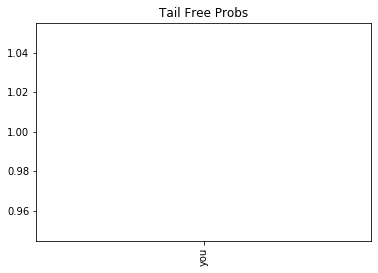

words in order  you
target word 

tail value 1
target index 539


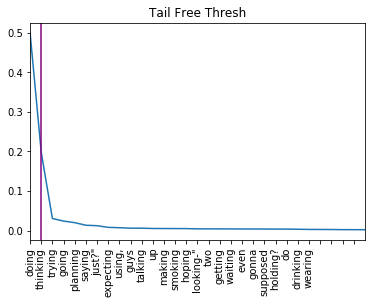

(array([25055]),)
 doing thinking trying going planning saying just?" expecting using, guys talking up making smoking hoping looking-" two getting waiting even gonna supposed holding? do drinking wearing… laughing about putting-..." think-- calling taking so carrying giving fucking...…"� aiming intending like actually in playing all shooting?!" coming working—" testing telling wondering bringing fighting watching,"– on able –— spraying eating writing running!?" really asking feeling that hiding for and seeing tink.. afraid there the staring crying suggesting implying a attempting yelling to screaming pulling ..." say sending plotting three - reading touching people…… DO … having at." still…. shouting after exactly ever cooking listening d driving pushing breathing selling injecting * buying hitting building messing. preparing suppose coughing last  dealing mixing feeding f…."….. complaining b wanting sneaking adding this being done drawing cleaning whispering blowing--- stopping with t

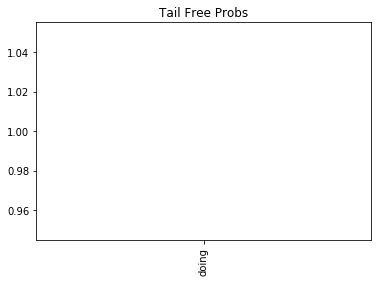

words in order  doing
target word  Cat
tail value 1
target index 1315


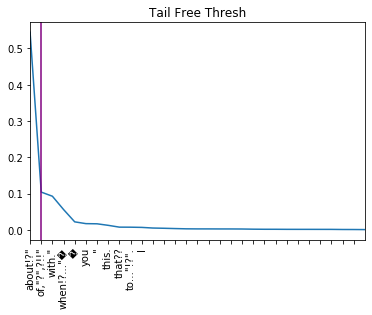

(array([39526]),)
?",??!" about!?" of,"?",?!!" with." when!?..."� � you " this. that?? to…"!?". I ?... in on , Mr here then though… man doing for now sir the again there-" today before if we", and at just " my-!!" by all guys…… back right while after out"? it  last or ' tonight buddy baby going - he exactly getting Sam..…." a using was~ kid ..." your anyway K—" son boy?, . dear making – dude yesterday killing earlier from people trying-- what— these thinking she Miss?' huh!! Doctor up boys …",'' would o Dad mate.... coming D s R being behind like over is Dr kids taking– brother??? so S / B putting...?; young girl .. mother boss/ Mom oh # eh as me k darling during … they O without around Harry ," *."" d….. w too really Ms M V T letting running: bringing giving already!",…. folks who F Captain― Master


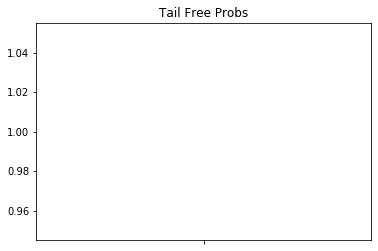

words in order ?"
target word aclysm
tail value 2
target index 43640


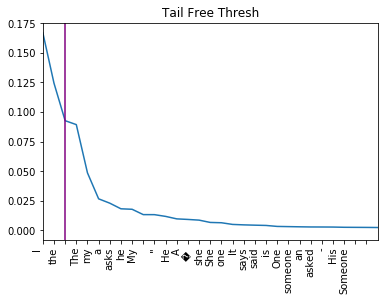

(array([27944]),)
 I
 the  The my a asks he My   " He A �  she She one It says said is One someone an asked - His Someone ― [ his it As<|endoftext|> comes yells An Her (

 This shouts Another T Dr K L 「 Sam Is No There another J C That Th G P St D demands Ruby cries
  O Harry R screams calls her S * Sh M Taylor Y this B Two they When All In Mr     V N , They < Gr --- i F Al Max ~ With m me ' H / What E Z Something . Nick Weiss Ch � : Car that Yang And, U Red You At Sm After — John Brian p� – Er Anna Chloe We you Mar th W ​ Bl Velvet Jaune Black ** ask questions came and l Danny has Blake Shit Sarah How Jack Angela Me Ron Elsa was White Tatt Suddenly Said Lisa Not Captain Kat Doctor Mal Don X Both Agent Fl Am whispers r Miss replies So IfI To But something > Le '' Fr Sl Can Har For Even Tor


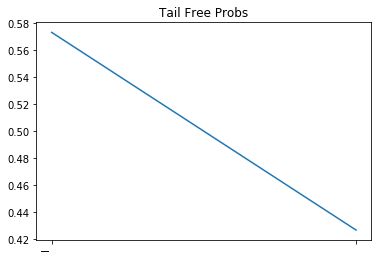

words in order  I

target word  is
tail value 1
target index 1112


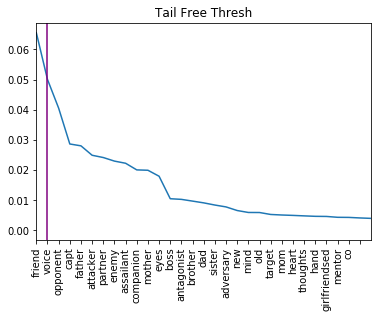

(array([17806]),)
 friend voice opponent capt father attacker partner enemy assailant companion mother eyes boss antagonist brother dad sister adversary new mind old target mom heart thoughts hand girlfriendsed mentor co teammate best foe boyfriend hands friends stomach interrog teacher ex pursu son victim nem companions body head enemies cowork phone wife assistant torment ally brain gun right fellow own savior name uncleself blood arms colleague little host shadow resc other good breath face superior older Dad buddy cousin ears classmate hero former left rival mouth words side neighbor character pal man daughter fingers hood doctor conscience instructor parents attackers husband throat weapon guide teammates first therapist unconscious question arm cell Uncle inner guard half nose kidn comrade roommate bad lover accompl driver mask legs favorite supervisor evil knife back aunt leader eye handler opponents ear reflection imaginary human abuser quarry subconscious master protagonist sc

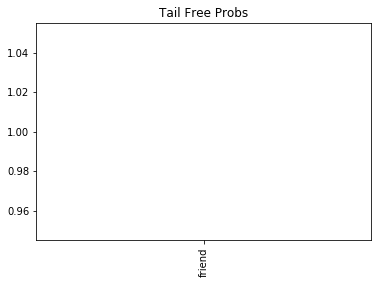

words in order  friend
target word  floating
tail value 1
target index 5444


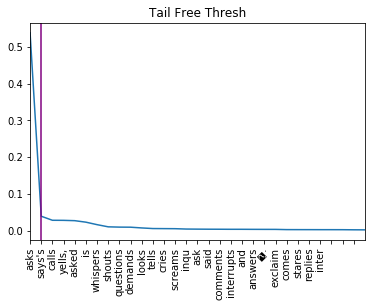

(array([34437]),)
 asks says's calls yells, asked is whispers shouts questions demands looks tells cries screams inqu ask said comments interrupts and answers �. exclaim comes stares replies inter has prompts ch leans pulls r ( mut wonders ple m y wh informs walks  starts st voice tries laughs gas responds- shri begins remarks p sigh puts approaches shoots continues snaps gr can suddenly suggests gigg blur called points sn at Amy who in grow , speaks murm begs his wants turns cr bell yelled bl keeps stands was
 offers qu smiles sp raises j goes the c [ enqu reaches catches w throws  eyes stops makes h ret bar sc smir questioned sits takes hears draws sne int asking gives urges will of lets sl notes with taps brings bursts from I slurs s observes t watches glances breat l gets presses reminds dr on complains hands thinks runs whispered gl g reads texts requests holds Erin my enters breaks innoc mo greets gently/ squ opens explains   pe f Emily grabs as told frown accuses gro introduces 

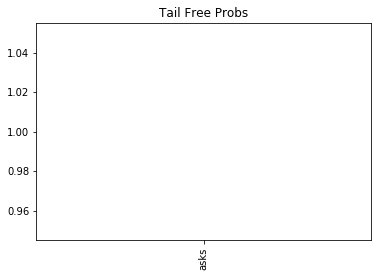

words in order  asks
target word  through
tail value 1
target index 1356


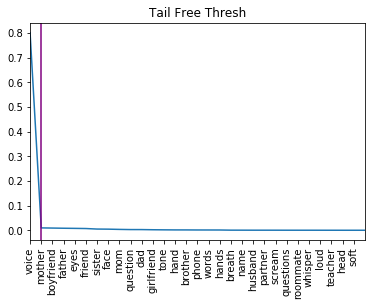

(array([32296]),)
 voice mother boyfriend father eyes friend sister face mom question dad girlfriend tone hand brother phone words hands breath name husband partner scream questions roommate whisper loud teacher head soft body blonde hus screams ex voices familiar daughter arms ghost mouth parents boss older expression red p muff reply friends gru assistant sweet gigg quiet arm co girl brown dark little cousin shocked blue sn lil son gaze man fingers ear step surprised cat s companion answering, best bright high pale old disemb panicked aunt laugh twin inqu small smile cold calm voiced whispers mind pet a Dad cowork car angry gentle asked yell footsteps black d wife call finger r horrified new cell younger response eye worried concerned classmate stern cries grandmother male questioning exasper uncle sm dog long lips cheerful ears comment crying voic stomach neighbor eyebrows " whispered heart jaw cry incred sob shri sarcastic t dead st in daddy look ch confused shout mum hair alarm m 

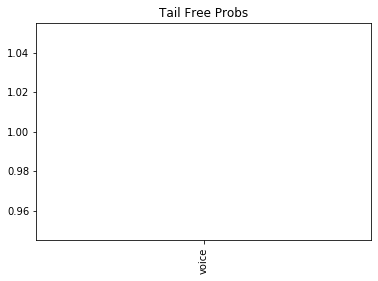

words in order  voice
target word  the
tail value 2
target index 112


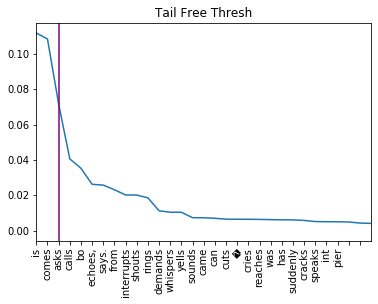

(array([23442]),)
 is comes asks calls bo echoes, says. from interrupts shouts rings demands whispers yells sounds came can cuts � cries reaches was has suddenly cracks speaks int pier ch r breaks reminds crack floats catches voices screams goes asked inter answers draws p shoots rises makes fills ho questions prompts and in brings begins starts bursts pops snaps seems said cro cut qu voice called urges carries tells bell continues buzz sque behind echoed m hus enters rang t pulls takes as over responds inqu offers th repeats picks greets appears holds replies
 returns warns ask intr sings gets st stops gas h waves com suggests commands raises bl the threatens's gives draw  bar grow reverber bark hangs could trails hits muff mut ( shakes crosses interrupted d tries se on follows erupt sounded grows . irrit approaches announces exclaim finally softly his war wh laughs eman chim murm doesn drown isn arrives a caught challenges j reson c orders informs reads come explodes vibr pe ple pres

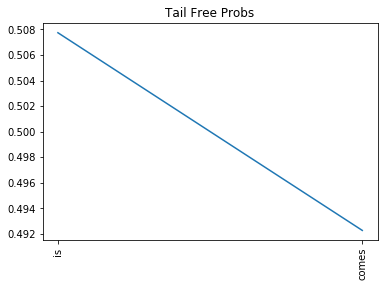

words in order  is comes
target word  street
tail value 1
target index 5172


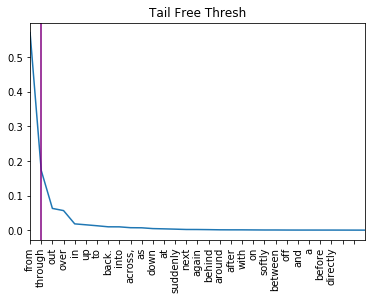

(array([23008]),)
 from through out over in up to back. into across, as down at suddenly next again behind around after with on softly between off and a before directly r closer towards beside close right when clear slowly screaming the toward almost ringing once my along unb for crashing forth via inside thru near within just while sharply during echoing rushing muff bar quickly above by ho now pouring str throughout soon bo straight like against d loud quietly t later running clearly
 calling slightly so yelling ch voice . more of wh crack faintly his outside p shortly coming gently but scree round int immediately weak m very still past one; alive st abruptly upon ( under forward piercing whispering  bouncing cold briefly saying th j shouting sl breath finally crying w that several " all - interrupt g  too this s deep b then cut thick not low without alongside no about laughing nearer seconds un: onto nearly an intermitt." angrily roaring dead amid buzzing unst pounding speaking fill

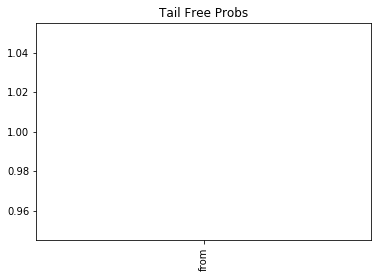

words in order  from
target word  towards
tail value 2
target index 139


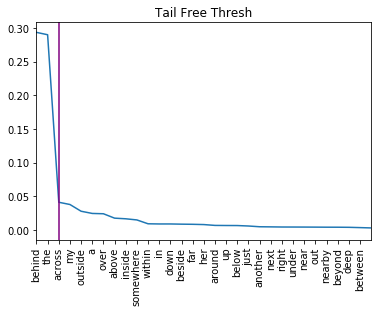

(array([26098]),)
 behind the across my outside a over above inside somewhere within in down beside far her around up below just another next right under near out nearby beyond deep between where nowhere downstairs close further on an afar upstairs at off one back underneath closer me about directly overhead farther several all some through beneath what to our from two as deeper three this among distant his ahead more both almost that their half by, elsewhere anywhere past there before away opposite halfway every atop something it ten along into miles high here either only left not five with so amongst nearly too again four your higher  front. I someone less its everywhere nearer now home other distance straight and low " roughly wherever well six round 10 for them when long quite slightly after even towards no very wide any us ear 2 mid top without of . immediately sitting 5 how 3 way last ' alongside barely twenty quietly forward many alone backstage mine against... exactly lower onc

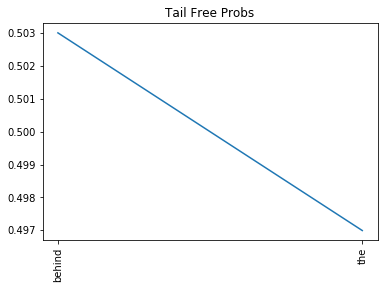

words in order  behind the
target word  me
tail value 2
target index 893


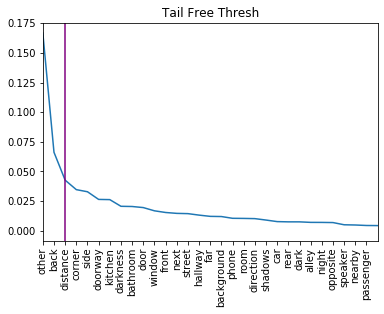

(array([35426]),)
 other back distance corner side doorway kitchen darkness bathroom door window front next street hallway far background phone room direction shadows car rear dark alley night opposite speaker nearby passenger wall left radio bedroom speakers right bottle ceiling crowd hall bed driver outside bushes distant top living hospital edge bottom house inside mirror stairs floor ground periphery tunnel woods small end corridor camera truck open screen bar empty black vehicle gun center tent depths couch table cell loudspe machine glass sound road apartment comm middle stair overhead pipe line hood headphones arm shoulder restroom coffee walls ear same windows weapon noise closet toilet main quiet building cockpit entrance computer darkened pocket others shower adjacent broken crack chair counter scene nearest ambulance roof air television interior dead emergency sidelines engine microphone head desk second sky upper furthe van mouth sidewalk near bag office balcony TV woman ba

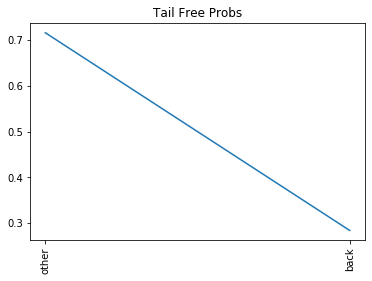

words in order  other back
target word ,
tail value 1
target index 29


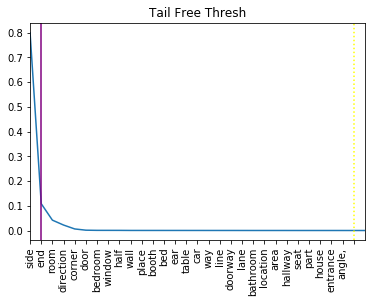

(array([30633]),)
 side end room direction corner door bedroom window half wall place booth bed ear table car way line doorway lane bathroom location area hallway seat part house entrance angle,side hall floor edge desk- front compartment exit apartment cell alley shoulder building back tent section path kitchen world night street dimension party spot speaker. arm point shore plane position stall office cabin aisle team one sideline's passenger wing of distance channel left pocket chair corridor right perspective phone group station couch balcony scene person ends day two hole driver far and hand nearby dorm vehicle terminal truck tunnel road rear set speakers bench chamber classroom bunk rooms level platform camera living sides parking man End vicinity bankroom camp space sidewalk hotel carriage time hospital bus zone locker voice extreme three podium cub field in sound woman bottle van next box store b bar to empty foot open site tower comm closet flank ( quarter restroom a cage the 

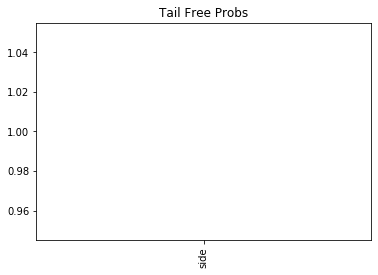

words in order  side
target word  fire
tail value 1
target index 480


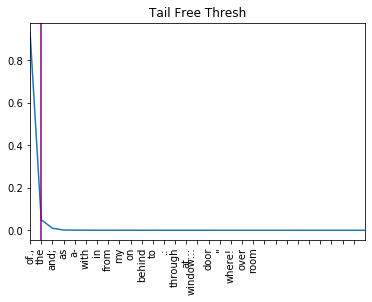

(array([23336]),)
 of., the and; as a- with in from my on behind to .: through at… window...
 door " where! over room -— while ( an her � for –.[.. when or just across by — but again before." so that.* after into now his our I wall's this [ screen like off out via if , down glass Of outside  who about near distance table beside only around without– next one still once which it -- along corner doorway camera ​ another their…. more.... up phone too me front ­ because below � ; back … line --- looking cell between half[?-- holding what o.< ― though nearby side she speaker OF all/ inside air entrance windows­ corridor shouting ...� bedroomof some  The".- under using almost toward towards pocket apartment against saying ahead fence  ​ instead walls : is somewhere overhead desk onto making<|endoftext|> ' your hallway not than […] wearing My bar," right every street yelling three its above there' yet then space frame time


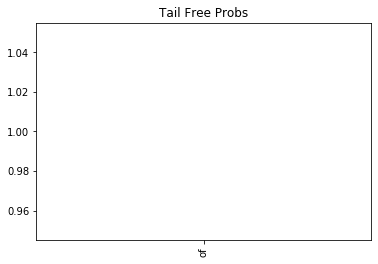

words in order  of
target word  and
tail value 3
target index 297


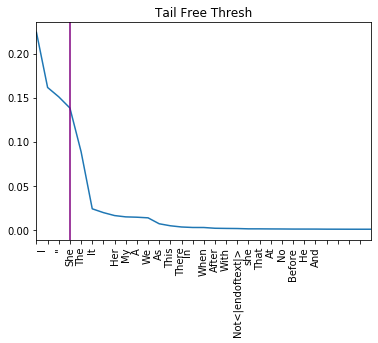

(array([25768]),)
  I
 " She The It    Her My A We As This There In
  When After With Not<|endoftext|> she That At No Before He And Looking If What From � For

 An All While One Something But To Without Even Just They Another     On ( So Standing * Like Behind Sm You [ '' Our Both Taking Now Despite Someone By the Then my T Sh P L How C Oh Is �    Its Still Since Once Suddenly Although Two Inst ' "... Everyone Though Maybe Everything F W ** Nothing Of her . S Me B Normally Turning G Every Well St D ​ Somehow Red Through Immediately M Sitting Blood Why Slowly Tears Some Yes Over Sc K Seeing "" Apparently < Shit Instead BeingI More Where Le ... Un H Walking Eyes i - Watching Bl Holding "… Having Good Or --- However N Pull Most E Outside Gl Th None Almost O Quick *** Only R Had � Moments Fl Again a Don Dro Using Right Y His Within   Gr Because J Who Inside Cl Let Here Silence Neither ~ Was 「 Damn Out "- it


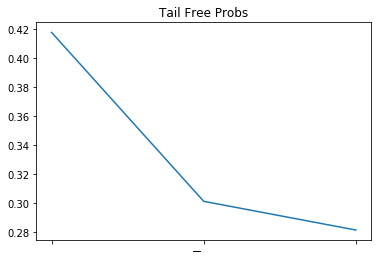

words in order   I

target word  smoke
tail value 2
target index 4004


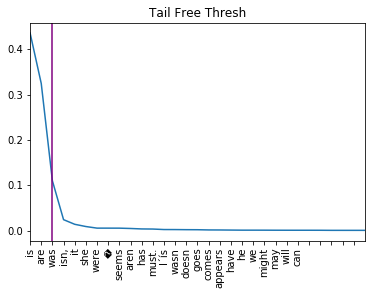

(array([21558]),)
's is are was isn, it she were � seems aren has must. I´ís wasn doesn goes comes appears have he we might may will can in should� really  they you had stands could seem a and lies… the ? . hasn looks would�'re sits′ weren ain , does * on –   ISafter`'d'! still [ seemed just … won appear
 of no at remainsÂin too now shouldn don exists: follows for to Is used�'ll '- her as only also makes actually am that……– behind needs being feels came be s with once before go takes never havenupon sounds look there < didn from� come this - again ( wouldn�..; couldn happens probably turns if my so� when falls suddenlyis sit stood "... sh not afterwith­for by certainly went wa ― else followed'm · ARE one ! | an Are appeared iss dose alwaysby — ­ even immediately''| f[< ought � already but all ** ~ ​


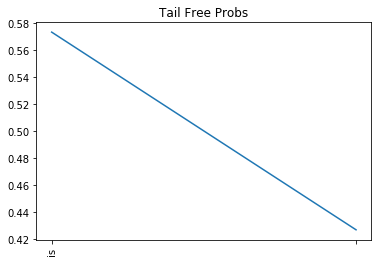

words in order 's is
target word  trailing
tail value 2
target index 2320


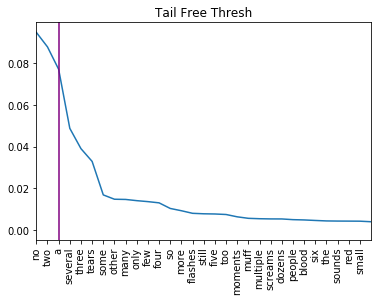

(array([28906]),)
 no two a several three tears some other many only few four so more flashes still five too moments muff multiple screams dozens people blood six the sounds red small dark voices now gas loud footsteps about traces others also sparks not hundreds at bruises r lots hands gunshots lights times just lines barely very long numerous bright noises cracks eyes little large already pockets faint shouts signs shadows whispers plenty an blue far words countless clouds seven white shards bags things enough sharp none dro holes shades those eight scratches black cr thousands pieces scattered heavy strange always echoes streaks half sl nine light nods scars children murm both questions hints 3 almost, tw different various s seconds deep fewer p all familiar spl ten probably even 2 twenty bursts fingers sc actually men flashing gaps quite cries bits guns tiny clearly another bullets brief around flames explosions drops occasional faces empty shots slight sm hand sh bl bodies smiles 

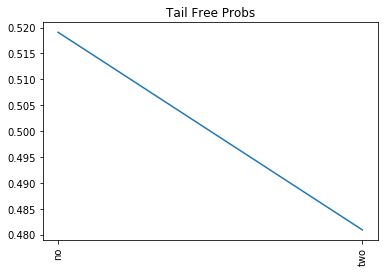

words in order  no two
target word  in
tail value 1
target index 210


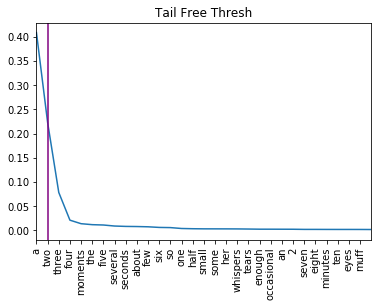

(array([32224]),)
 a two three four moments the five several seconds about few six so one half small some her whispers tears enough occasional an 2 seven eight minutes ten eyes muff my 3 barely flashes brief too murm dark those slightly shadows feet black slight twenty lights light nine handful white people words scattered very minor silence red bits around clouds faint fifteen twelve footsteps 10 me his empty now just m r screams nods like fists smiles other cr tw inches p 4 glances stares these fragments thirty tiny blue gl scratches questions little glimps hints hands 5 eleven more centimeters, noises shards shades vague dim pieces this gr maybe certain sounds 1 walls bruises sl yellow traces h no  scraps short men weak us static only soft loud silent our odd windows muted candles hours gas sm sparks signs pockets sporadic mur waves visible that dozens 12 . girls sil blood familiar rows 6 green cracks as many quiet bl broken pale  t meters drops bare scant thirteen voices minimal * 

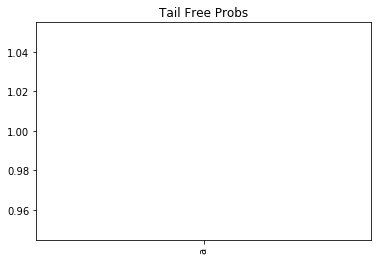

words in order  a
target word  his
tail value 1
target index 811


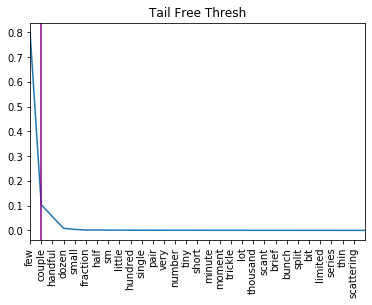

(array([26022]),)
 few couple handful dozen small fraction half sm little hundred single pair very number tiny short minute moment trickle lot thousand scant brief bunch split bit limited series thin scattering slight second quarter good million total foot faint third large mere select muff week quick certain matter group vague fair scattered flash min sl light t loud hint part pile p fleeting two tw set fist m hand man g h portion blur slightly r bare soft slim line meager variety shadow token st lone l finite simple black dark ton fragment cloud patch random low trio drop wave partial steady shell crack gl crowd stack long meas cluster whole narrow chorus broken band slow f sparse s dim sp three whisper j string day strange shade multitude trace sick month heap stream minimal solid  heartbeat minor squ ' great row " girl mix sprink be cl c relatively full minimum Few while fl weak skeleton stray red th moments barely glimpse bag dull ha flurry lit . minority thr head touch woman- whi

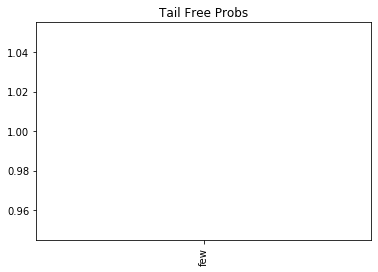

words in order  few
target word  path
tail value 1
target index 5536


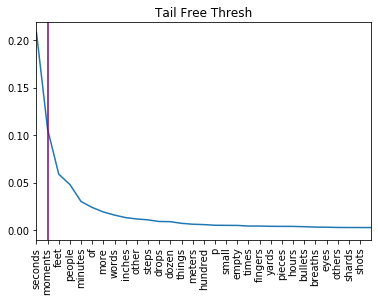

(array([33784]),)
 seconds moments feet people minutes of more words inches other steps drops dozen things meters hundred p small empty times fingers yards pieces hours bullets breaths eyes others shards shots windows tears remaining centimeters bars days short scattered footsteps strands stray, left frames sl broken friends hands bottles men bruises red weeks flashes shadows lights hairs sharp visible loud objects bits voices rows students spots blocks dark cr mill white quick familiar fragments gunshots rounds faces black blood brief bodies light places lines scratches metres chairs muff bright cars walls gas dro minor tiny points months in spl sounds good few notes cracks questions sparks little ways lingering bystanders items clouds pe hand doors gl long details r thousand holes bugs shades teeth figures dead kids d members glasses police soldiers pairs open close miles pictures body instances loose children nearby survivors h foot large stares girls grains m leaves bursts scraps o

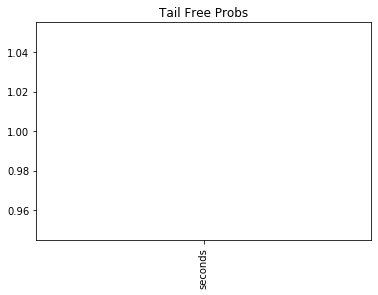

words in order  seconds
target word .
tail value 3
target index 23


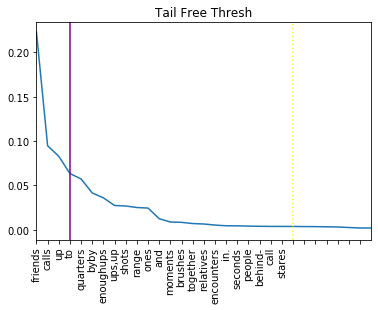

(array([21705]),)
- friends calls up to quarters byby enoughups ups,up shots range ones and moments brushes together relatives encounters in. seconds people behind‐ call stares p at family knit whispers windows proximity gr bl pieces bodiesbys acquaintances objects of neighbors members distance cr seats m flashes r contacts conversations spaces companionss pairs doors minutes hands shouts bursts groups notesouts close figures voices relationships confid things witnesses fights men d glances hugs yards g eye approx associates on for looking buddies shades eyes looks misses friend h with­ silence personal walls air numbers brush words sh places combat blasts– rounds hand shadows ranges as gl flames contact sets spots allies guards pals stepsers observers cou sw ties fists  glimps scratches lines am l from bits arms cuts rows comrades sn hits left matches around orders between blood distances ( s feet or faces amounts survivors cases ins knocks connections after confines group passes but 

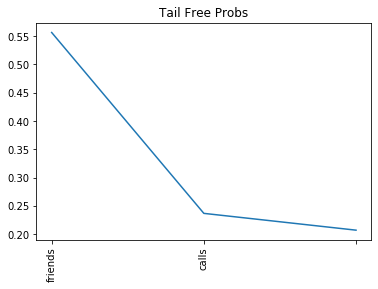

words in order - friends calls
target word  He
tail value 1
target index 5808


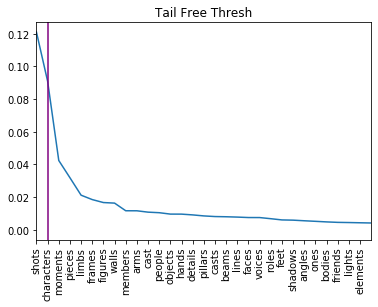

(array([30193]),)
 shots characters moments pieces limbs frames figures walls members arms cast people objects hands details pillars casts beams lines faces voices roles feet shadows angles ones bodies friends lights elements positions body parts trees distance steps seconds shot light breaths players seats bullets hand images footsteps l bystanders eyes strands scenes arm bits spaces chairs legs witnesses silhou camera blows sounds a surfaces fans cameras weapons forms, cuts punches buildings turns p photos pairs frame tracks effects chunks words corners looks g structures c cars blades actors cr ribs victims glances props vehicles fists bars notes crowd units individuals hits me her nods and shapes targets us muscles conversations d bursts layers groups- cracks fingers things the features marks cas yards doors of students stories columns bones eye bushes crew fire wall windows gunshots shades stands blocks items close survivors t edges hairs drops supports factors posts character spe

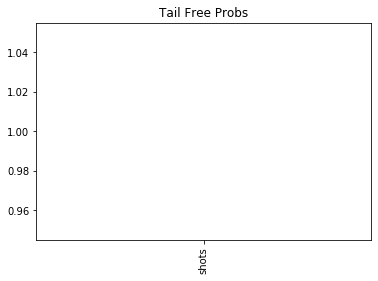

words in order  shots
target word  has
tail value 1
target index 411


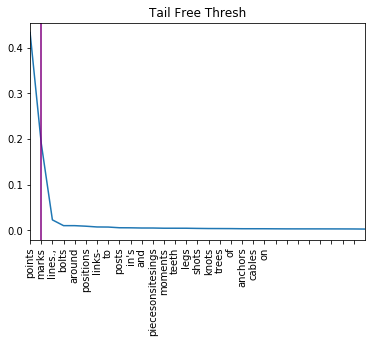

(array([9000]),)
ages points marks lines., bolts around positions links- to posts in's and piecesonsitesings moments teeth legs shots knots trees of anchors cables onhold holds words beams frames things strands characterspoints holding objects arms threads members holes str forage from bonds lights hold at clips stringsiteoms with men between ropes point bodiesions ties wires that as pillars signs rings friends people bits forces hooks buildings cr cuts crew groups feet stitches connections guards units behind here notes limbs letters plantsmen muscleslets like rods articles images chains eyes vines locks wounds nails boxes elements texts Iamentsisesants structures fingers bars blocks girls s guys left hairs l man bones punches text byies devices spells columns set support weapons staples towers braces backs p or straps items troops spots chords forms who pinsposts breaks the sticks postisms but locations rows stands hands brace bracketsals tenants pairs cracks photos moves close place

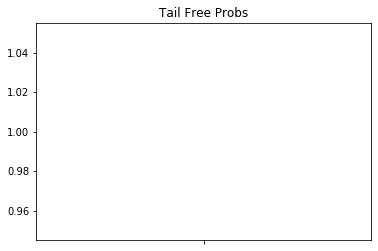

words in order ages


In [159]:
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

#time_point = 1
plot_window_lim =30

def ema_eff(alpha,  vals, perc_acc=0.99 ):
    k = int(np.log(1-perc_acc)/np.log(1-alpha)) # this should be calculated at the start not in the loop!! 
    
    if k>vals.shape[0]: # CHECK THIS SHAPE MEASUREMENT
        k = vals.shape[0]
    
    # have something to check the tail id is less than the window size. 
    
    window_weights = (1-alpha)**np.arange(0,k)
    p = k-1
    # THIS CAN BE DONE IN A BATCH V EFFICIENTLY
    out = torch.nn.functional.conv1d(torch.from_numpy(vals).unsqueeze(0).unsqueeze(1).double(),torch.from_numpy(window_weights).unsqueeze(0).unsqueeze(1), padding=p )
    out = alpha*out[0,0,p:]
    #print(out.shape)
    
    return out.numpy()


print('Prompt: \n')
print(decoder_text( text[batch][ind, :prompt_length]))
print('\n ====== \n ')
print('Generation: \n ')
gen = text[batch][ind, prompt_length:]
print(decoder_text( text[batch][ind, prompt_length:]))
print('======')

target_prob_assigned = []

for time_point in range(0,50):


    sps = softmax(-np.sort(-all_logits[batch][ind, :, time_point]))
    indices = np.argsort(-all_logits[batch][ind, :, time_point])

    if key == 'tfs':
        if par != 'None':
            sps_tfs = ema_eff(par, sps, perc_acc=0.99 )
            sps_round= np.around(sps_tfs,2) # ROUNDING UP THE SPS!

        else: 
            sps_round= np.around(sps,2) # ROUNDING UP THE SPS!

        first = sps_round[1:] - sps_round[:-1]
        second = first[1:] - first[:-1]
        tail_id = second.shape[0]-np.argmax(np.flip(second)>0.001)    
    
    target_plot_index = np.where(target[time_point]==indices)[0][0] # this is the position in the indices where the word matches. 
    
    print('target word', decoder_text([target[time_point]]))

    #finding the tail without any alpha first
    ids_above_tail = indices[:tail_id] # use these indices to determine what the words are and their probabilities. 
    tail_free_probs = softmax(all_logits[batch][ind, ids_above_tail, time_point]) # it is already applying the softmax too
    
    target_prob_assigned.append(sps[target_plot_index]) # storing the probability given to the real word. 

    print('tail value', tail_id)
    print('target index', target_plot_index)

    plt.plot(np.arange(sps.shape[0]),sps)
    plt.xlim([0,plot_window_lim])
    plt.axvline(tail_id, color='purple', linestyle='solid')
    plt.axvline(target_plot_index, color='yellow', linestyle='dotted')
    plt.xticks(np.arange(plot_window_lim), decoder_text(indices[:plot_window_lim]).split(' ')[1:], rotation='vertical')
    plt.title('Tail Free Thresh')
    plt.show()
    
    print(np.where(indices==17080))
    print(decoder_text(indices[:200]))

    plt.plot(np.arange(tail_free_probs.shape[0]), tail_free_probs)
    plt.title('Tail Free Probs')
    if target_plot_index in ids_above_tail:
        plt.axvline(target_plot_index, color='yellow', linestyle='dotted')
    plt.xticks(np.arange(tail_free_probs.shape[0]), decoder_text(ids_above_tail).split(' ')[1:], rotation='vertical')
    plt.show()

    print('words in order',decoder_text(ids_above_tail))

    print('=============')

## Getting the probability assigned to the ground truth over time. 

In [29]:
time_point

128

In [ ]:
all

In [31]:
all_logits[batch][ind, :, time_point].shape

(50257,)

In [47]:
prompts.iloc[choose_prompt].test_source

'[WP] A redditor grows increasingly depressed because no one replies to his WritingPrompts. Then one day....'

In [45]:
len(prompts.iloc[choose_prompt].test_target.split(' '))

121

In [43]:
len(prompts.iloc[choose_prompt].Prompt.split(' '))

138

In [33]:
target

[4465,
 2877,
 13,
 220,
 198,
 220,
 198,
 1052,
 1711,
 1568,
 339,
 4504,
 13,
 1867,
 338,
 428,
 287,
 262,
 5228,
 30,
 1052,
 10912,
 22878,
 0,
 679,
 550,
 1239,
 1775,
 530,
 878,
 11,
 290,
 1309,
 503,
 281,
 6568,
 409,
 20931,
 355,
 339,
 28384,
 340,
 13,
 679,
 14028,
 543,
 10457,
 6260,
 550,
 7082,
 13,
 1220,
 84,
 14,
 43,
 9613,
 62,
 18565,
 4053,
 30,
 1220,
 84,
 14,
 26130,
 70,
 343,
 1754,
 1472,
 30,
 6674,
 1220,
 84,
 14,
 35,
 32040,
 1840,
 30,
 679,
 18484,
 379,
 465,
 13734,
 11,
 739,
 30613,
 1150,
 13,
 220,
 198,
 220,
 198,
 554,
 2882,
 284,
 465,
 10457,
 6152,
 11,
 1220,
 84,
 14,
 35,
 26458,
 3388,
 3388,
 27211,
 550,
 7082,
 2391,
 25,
 220,
 198,
 220,
 198,
 7559,
 43,
 349,
 285,
 77,
 11,
 428,
 427,
 463,
 307,
 308,
 463,
 13,
 10148]

In [ ]:
sps[target[time_point]]

In [87]:
del all_logits

import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

num_samples = 100
batch_size = 25
num_batches = num_samples//batch_size

ground_truth_probs = dict()

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        if par == 200:
            continue
        if par ==None:
            par = "None"
        all_logits = pickle.load( gzip.open('gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        #rand_selects = pickle.load( gzip.open('gpt-2_output/prompt_rand_selections_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))

        for batch in range(num_batches):
            #for p_ind in range(batch*batch_size, (batch*batch_size)+batch_size ):
            for ind in range(0,batch_size):
                
                p_ind = ind+(batch_size*batch)

                choose_prompt =rand_selects[p_ind]
                prompt_target_encoded = enc.encode(prompts.iloc[choose_prompt].Prompt)
                target = prompt_target_encoded[prompt_length:] # encode and get the prompt length. The rest is the ground truth. 

                if len(target) < all_logits[0].shape[2]:
                    #print('skipping as ground truth is too short.')
                    continue

                target_prob_assigned = []

                for time_point in range(0,all_logits[0].shape[2]):
                    #print(time_point)

                    sps = softmax(all_logits[batch][ind, :, time_point])

                    #target_plot_index = sps[target[time_point]] #np.where(target[time_point]==indices)[0][0] # this is the position in the indices where the word matches.

                    target_prob_assigned.append(sps[target[time_point]])

                ground_truth_probs[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)] = target_prob_assigned





Key is: tfs
Key is: n
Key is: k


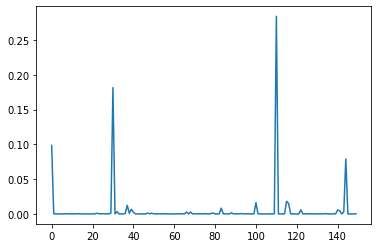

In [88]:
plt.plot(range(len(target_prob_assigned)), target_prob_assigned)

In [89]:
np.asarray(vals_to_plot).shape

(0,)

In [90]:
vals_to_plot.mean()

/home/trentonbricken/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.


nan

Key is: tfs
tfs-sampling-type_None_prompt
tfs-sampling-type_0.01_prompt
tfs-sampling-type_0.05_prompt
tfs-sampling-type_0.1_prompt
tfs-sampling-type_0.5_prompt
tfs-sampling-type_0.75_prompt
Key is: n
n-sampling-type_0.1_prompt
n-sampling-type_0.25_prompt
n-sampling-type_0.5_prompt
n-sampling-type_0.75_prompt
n-sampling-type_0.9_prompt
Key is: k
k-sampling-type_1_prompt


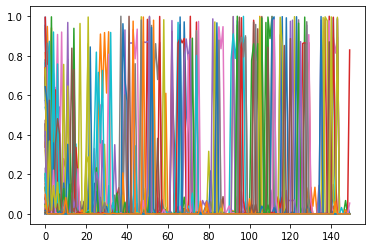

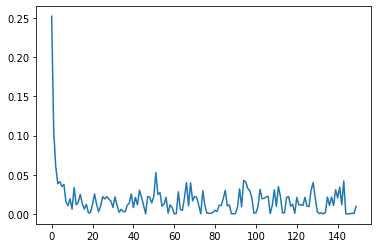

k-sampling-type_10_prompt
k-sampling-type_40_prompt
k-sampling-type_200_prompt


/home/trentonbricken/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice.


In [91]:
global_mean = dict()
for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        print(key+'-sampling-type_'+str(par)+'_prompt')
        vals_to_plot = []
        for p_ind in range(num_samples):
            
            try:
                vals_to_plot.append(ground_truth_probs[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)])
            except:
                pass
                #print('couldnt load in as not here.')
        vals_to_plot = np.asarray(vals_to_plot)
        
        if key == "k" and str(par)=='1':
            plt.plot(vals_to_plot.T)
            plt.show()
            plt.plot(vals_to_plot.mean(axis=0))
            plt.show()
        
        global_mean[key+'-sampling-type_'+str(par)+'_prompt'] = vals_to_plot.mean() 
        print('=======')

In [94]:
pickle.dump(vals_dict, gzip.open('Probability_given_to_ground_truth_dict_July14.pickle', 'wb'))

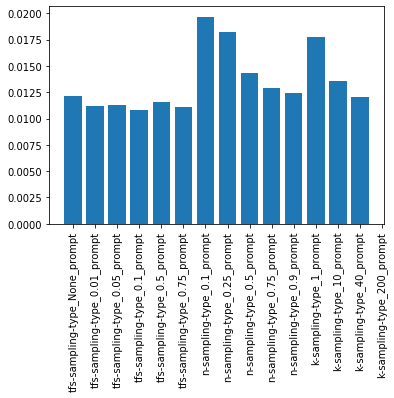

In [92]:
plt.bar(global_mean.keys(), global_mean.values())
plt.xticks(rotation='vertical')
plt.show()

### I could also try to get a binary output for whether or not the true word was above the tail id.

# The different approaches tail slicers in rank order. Do this for the absolute cut off and also the % of the CDF taken!

In [106]:
del all_logits

import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import numpy as np
import torch

num_samples = 100
batch_size = 25
num_batches = num_samples//batch_size

vals_dict = {'n': [0.1, 0.25, 0.5, 0.75, 0.9], 'k':[1,10,40,200],  'tfs':[None, 0.01, 0.05, 0.1, 0.5, 0.75 ]}

def nucleus_calc(thresh, vals):
    return np.argmax(np.cumsum(vals)>thresh)+1

def ema_eff(alpha,  vals, perc_acc=0.99 ):
    k = int(np.log(1-perc_acc)/np.log(1-alpha)) # this should be calculated at the start not in the loop!! 
    
    if k>vals.shape[0]: # CHECK THIS SHAPE MEASUREMENT
        k = vals.shape[0]
    
    # have something to check the tail id is less than the window size. 
    
    window_weights = (1-alpha)**np.arange(0,k)
    p = k-1
    # THIS CAN BE DONE IN A BATCH V EFFICIENTLY
    out = torch.nn.functional.conv1d(torch.from_numpy(vals).unsqueeze(0).unsqueeze(1).double(),torch.from_numpy(window_weights).unsqueeze(0).unsqueeze(1), padding=p )
    out = alpha*out[0,0,p:]
    #print(out.shape)
    
    return out.numpy()

all_tail_ids = dict()
all_tail_cdfs = dict()

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        
        print(key+'-sampling-type_'+str(par))
        
        if par == 200:
            continue
        if par ==None:
            par = "None"
        all_logits = pickle.load( gzip.open('gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        #text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        #rand_selects = pickle.load( gzip.open('gpt-2_output/prompt_rand_selections_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))

        temp_tail_cdfs = np.zeros([num_samples, all_logits[0].shape[2]])
        temp_tail_ids = np.zeros([num_samples, all_logits[0].shape[2]])

            
        for batch in range(num_batches):
        #for p_ind in range(batch*batch_size, (batch*batch_size)+batch_size ):
            for ind in range(0,batch_size):

                arr_ind = ind+(batch_size*batch)

                if arr_ind%25 == 0:
                    print('index', str(arr_ind))

                for time_point in range(0,all_logits[0].shape[2]):

                    sps = softmax(-np.sort(-all_logits[batch][ind, :, time_point]))

                    if key == 'tfs':
                        if par != 'None':
                            sps_tfs = ema_eff(par, sps, perc_acc=0.99 )
                            sps_round= np.around(sps_tfs,2) # ROUNDING UP THE SPS!
                        
                        else: 
                            sps_round= np.around(sps,2) # ROUNDING UP THE SPS!
                        
                        first = sps_round[1:] - sps_round[:-1]
                        second = first[1:] - first[:-1]
                        tail_id = second.shape[0]-np.argmax(np.flip(second)>0.001)
     
                    elif key=='k': 
                        tail_id = par
                        
                    elif key=='n':
                        tail_id = nucleus_calc(par, sps)

                    tail_cdf= np.sum(sps[:tail_id])

                    temp_tail_ids[arr_ind, time_point] = tail_id
                    temp_tail_cdfs[arr_ind, time_point] = tail_cdf
                
        all_tail_ids[key+'-sampling-type_'+str(par)] = temp_tail_ids
        all_tail_cdfs[key+'-sampling-type_'+str(par)] = temp_tail_cdfs
        

Key is: n
n-sampling-type_0.1
index 0
index 25
index 50
index 75
n-sampling-type_0.25
index 0
index 25
index 50
index 75
n-sampling-type_0.5
index 0
index 25
index 50
index 75
n-sampling-type_0.75
index 0
index 25
index 50
index 75
n-sampling-type_0.9
index 0
index 25
index 50
index 75
Key is: k
k-sampling-type_1
index 0
index 25
index 50
index 75
k-sampling-type_10
index 0
index 25
index 50
index 75
k-sampling-type_40
index 0
index 25
index 50
index 75
k-sampling-type_200
Key is: tfs
tfs-sampling-type_None
index 0
index 25
index 50
index 75
tfs-sampling-type_0.01
index 0
index 25
index 50
index 75
tfs-sampling-type_0.05
index 0
index 25
index 50
index 75
tfs-sampling-type_0.1
index 0
index 25
index 50
index 75
tfs-sampling-type_0.5
index 0
index 25
index 50
index 75
tfs-sampling-type_0.75
index 0
index 25
index 50
index 75


In [112]:
pickle.dump(all_tail_ids, gzip.open('Tail_IDs_dict_July14.pickle', 'wb'))
pickle.dump(all_tail_cdfs, gzip.open('Tail_CDFs_dict_July14.pickle', 'wb'))

In [113]:
'''all_tail_tfs_ids = pickle.load(gzip.open('Tail_IDs_TFS_dict_July14.pickle', 'rb'))
all_tail_tfs_cdfs = pickle.load(gzip.open('Tail_CDFs_TFS_dict_July14.pickle', 'rb'))'''

"all_tail_tfs_ids = pickle.load(gzip.open('Tail_IDs_TFS_dict_July14.pickle', 'rb'))\nall_tail_tfs_cdfs = pickle.load(gzip.open('Tail_CDFs_TFS_dict_July14.pickle', 'rb'))"

In [114]:
# need to have them all compete against each other to see what is the highest in each of the positions. 

very_first = True

#vals_dict = {'n': [0.1, 0.25, 0.5, 0.75, 0.9], 'k':[1,10,40,200]  } #'tfs':[None, 0.01, 0.05, 0.1, 0.5, 0.75 ]

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        
        if par ==200:
            continue
        
        flat_ids = all_tail_ids[key+'-sampling-type_'+str(par)].flatten()
        flat_cdfs = all_tail_cdfs[key+'-sampling-type_'+str(par)].flatten()

        if very_first ==True:

            tail_id_df = pd.DataFrame({key+'-sampling-type_'+str(par):flat_ids})
            tail_cdf_df = pd.DataFrame({key+'-sampling-type_'+str(par):flat_cdfs})
            very_first=False

        else:

            tail_id_df[key+'-sampling-type_'+str(par)] = flat_ids
            tail_cdf_df[key+'-sampling-type_'+str(par)] = flat_cdfs
        

Key is: tfs
Key is: n
Key is: k


In [115]:
'''vals_dict = {'tfs':[None, 0.01, 0.05, 0.1, 0.5, 0.75 ]}


for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:


        flat_ids = all_tail_tfs_ids[key+'-sampling-type_'+str(par)].flatten()
        flat_cdfs = all_tail_tfs_cdfs[key+'-sampling-type_'+str(par)].flatten()

        

        tail_id_df[key+'-sampling-type_'+str(par)] = flat_ids
        tail_cdf_df[key+'-sampling-type_'+str(par)] = flat_cdfs'''

"vals_dict = {'tfs':[None, 0.01, 0.05, 0.1, 0.5, 0.75 ]}\n\n\nfor key, params in vals_dict.items():\n    print('Key is:', key)\n    for par in params:\n\n\n        flat_ids = all_tail_tfs_ids[key+'-sampling-type_'+str(par)].flatten()\n        flat_cdfs = all_tail_tfs_cdfs[key+'-sampling-type_'+str(par)].flatten()\n\n        \n\n        tail_id_df[key+'-sampling-type_'+str(par)] = flat_ids\n        tail_cdf_df[key+'-sampling-type_'+str(par)] = flat_cdfs"

In [116]:
tail_id_df.head()

,tfs-sampling-type_None,tfs-sampling-type_0.01,tfs-sampling-type_0.05,tfs-sampling-type_0.1,tfs-sampling-type_0.5,tfs-sampling-type_0.75,n-sampling-type_0.1,n-sampling-type_0.25,n-sampling-type_0.5,n-sampling-type_0.75,n-sampling-type_0.9,k-sampling-type_1,k-sampling-type_10,k-sampling-type_40
0,21.0,2.0,13.0,16.0,19.0,20.0,1.0,2.0,6.0,31.0,182.0,1.0,10.0,40.0
1,19.0,1.0,1.0,1.0,3.0,3.0,1.0,2.0,4.0,12.0,129.0,1.0,10.0,40.0
2,20.0,3.0,11.0,14.0,21.0,21.0,1.0,2.0,4.0,5.0,19.0,1.0,10.0,40.0
3,21.0,2.0,7.0,11.0,16.0,16.0,1.0,2.0,17.0,78.0,478.0,1.0,10.0,40.0
4,6.0,2.0,4.0,7.0,12.0,13.0,1.0,1.0,24.0,1.0,306.0,1.0,10.0,40.0


In [117]:
tail_cdf_df.head()

,tfs-sampling-type_None,tfs-sampling-type_0.01,tfs-sampling-type_0.05,tfs-sampling-type_0.1,tfs-sampling-type_0.5,tfs-sampling-type_0.75,n-sampling-type_0.1,n-sampling-type_0.25,n-sampling-type_0.5,n-sampling-type_0.75,n-sampling-type_0.9,k-sampling-type_1,k-sampling-type_10,k-sampling-type_40
0,0.708745,0.301073,0.646504,0.678875,0.698433,0.703658,0.195557,0.301073,0.518905,0.750658,0.900142,0.195557,0.602061,0.774605
1,0.863986,0.946958,0.946958,0.946958,0.969668,0.969668,0.224044,0.352960,0.556938,0.756891,0.900081,0.224044,0.872809,0.945126
2,0.771999,0.457312,0.786957,0.823703,0.866004,0.866004,0.274589,0.363976,0.570778,0.783390,0.901561,0.274589,0.700612,0.818081
3,0.466450,0.341498,0.582590,0.619094,0.650876,0.650876,0.486848,0.256738,0.506252,0.750910,0.900101,0.486848,0.822745,0.939115
4,0.921489,0.729414,0.845933,0.879887,0.916366,0.921669,0.645843,0.470392,0.502961,0.809627,0.900201,0.645843,0.460595,0.683131


In [86]:
tail_id_df.shape

(15000, 14)

In [87]:
tail_id_df.iloc[0].values

array([  1.,   2.,   6.,  31., 182.,   1.,  10.,  40.,  21.,   2.,  13.,
        16.,  19.,  20.])

In [88]:
np.argsort(tail_id_df.iloc[0,:].values)

array([ 0,  5,  1,  9,  2,  6, 10, 11, 12, 13,  8,  3,  7,  4])

In [89]:

def get_ranking(df):
    ret = []
    for ind in range(df.shape[0]):
        x = df.loc[ind]
        ranked_inds = np.argsort(x.values)
        temp_ret = np.zeros(len(ranked_inds))
        for i in range(len(ranked_inds)):
            temp_ret[ranked_inds[i]] = i+1
    
        ret.append(temp_ret)
    return np.asarray(ret)
        
#get_ranking(tail_id_df)

array([[ 1.,  3.,  5., ...,  8.,  9., 10.],
       [ 1.,  6.,  9., ...,  5.,  7.,  8.],
       [ 1.,  3.,  5., ...,  9., 12., 13.],
       ...,
       [ 1.,  2.,  6., ..., 11., 10.,  9.],
       [ 1.,  2.,  5., ...,  9., 11., 10.],
       [ 1.,  2.,  9., ...,  6., 12., 10.]])

In [90]:
tail_id_df_ranking = pd.DataFrame(get_ranking(tail_id_df))
tail_id_df_ranking.columns = tail_id_df.columns

In [91]:
tail_id_df_ranking.head()

,n-sampling-type_0.1,n-sampling-type_0.25,n-sampling-type_0.5,n-sampling-type_0.75,n-sampling-type_0.9,k-sampling-type_1,k-sampling-type_10,k-sampling-type_40,tfs-sampling-type_None,tfs-sampling-type_0.01,tfs-sampling-type_0.05,tfs-sampling-type_0.1,tfs-sampling-type_0.5,tfs-sampling-type_0.75
0,1.0,3.0,5.0,12.0,14.0,2.0,6.0,13.0,11.0,4.0,7.0,8.0,9.0,10.0
1,1.0,6.0,9.0,11.0,14.0,2.0,10.0,13.0,12.0,3.0,4.0,5.0,7.0,8.0
2,1.0,3.0,5.0,6.0,10.0,2.0,7.0,14.0,11.0,4.0,8.0,9.0,12.0,13.0
3,1.0,3.0,10.0,13.0,14.0,2.0,6.0,12.0,11.0,4.0,5.0,7.0,8.0,9.0
4,1.0,2.0,12.0,3.0,14.0,4.0,9.0,13.0,7.0,5.0,6.0,8.0,10.0,11.0


In [92]:
tail_cdf_df_ranking = pd.DataFrame(get_ranking(tail_cdf_df))
tail_cdf_df_ranking.columns = tail_cdf_df.columns

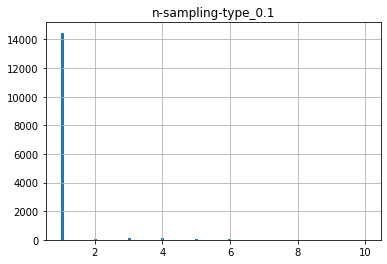

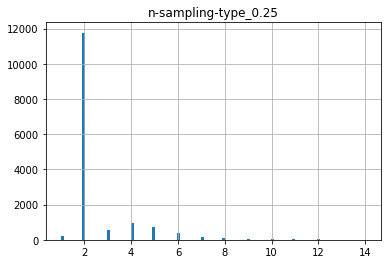

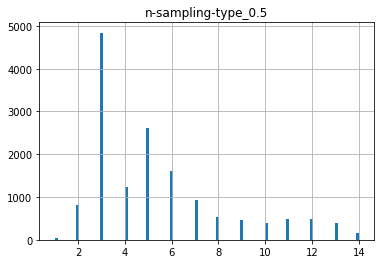

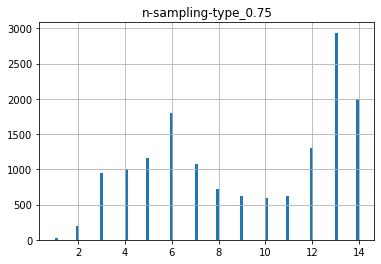

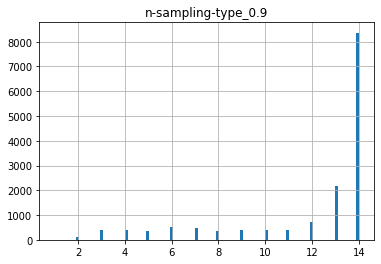

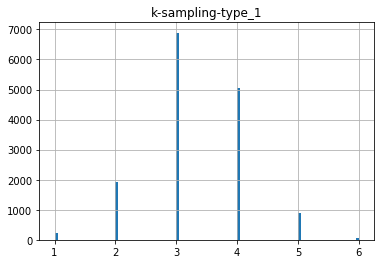

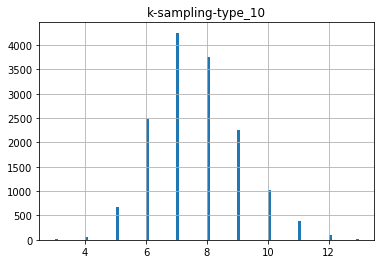

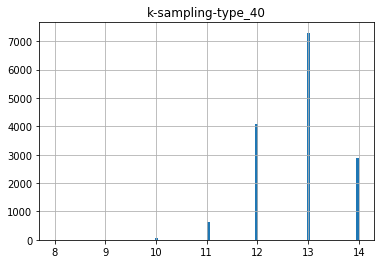

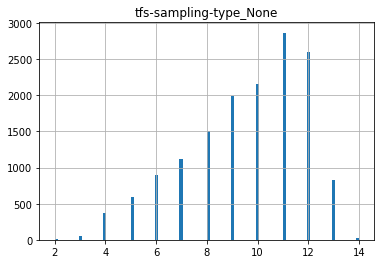

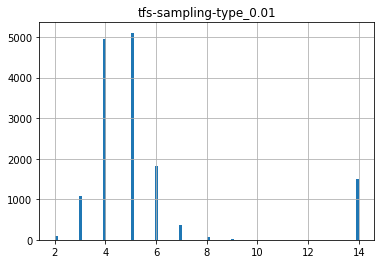

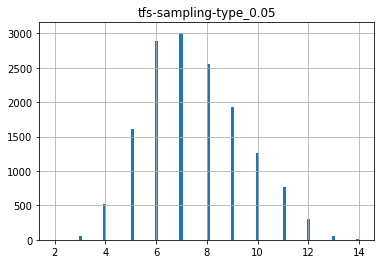

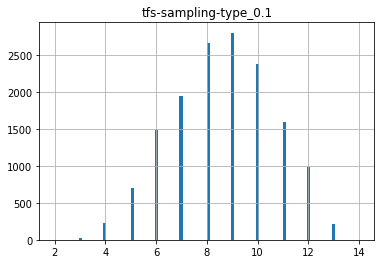

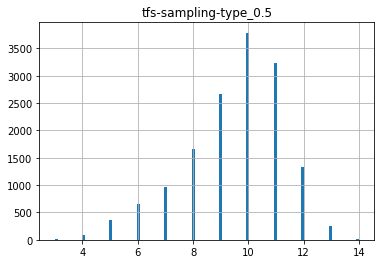

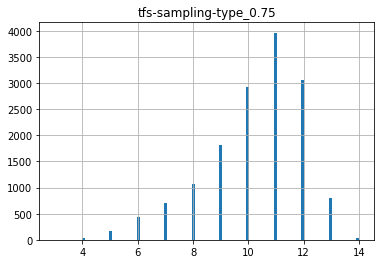

In [93]:
for c in tail_id_df_ranking.columns: 
    
    tail_id_df_ranking[c].hist(bins=100)
    plt.title(c)
    plt.show()

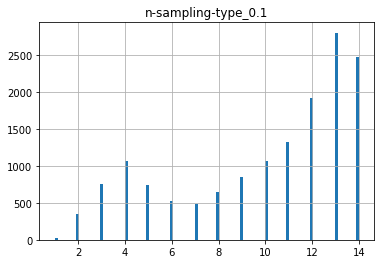

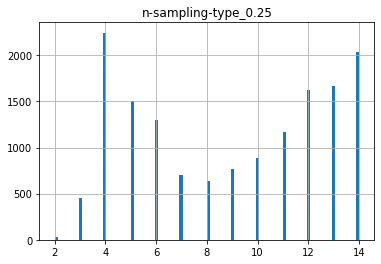

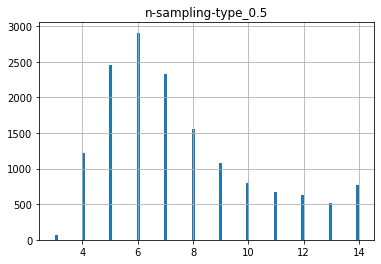

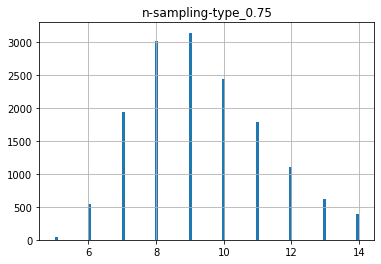

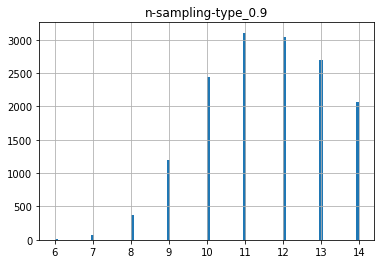

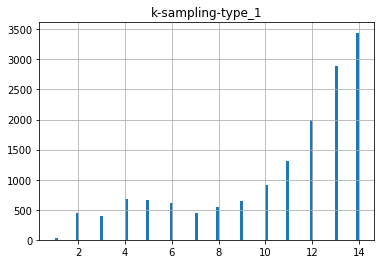

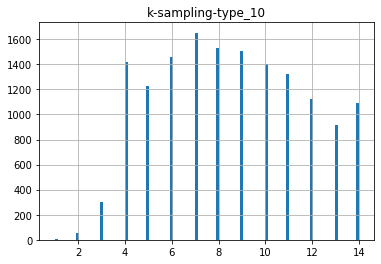

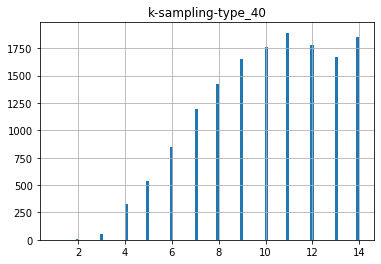

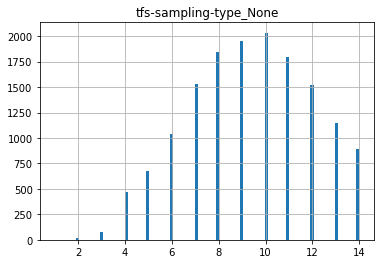

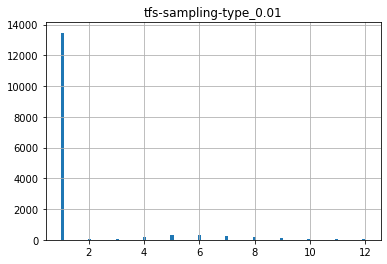

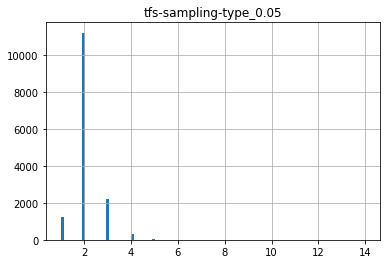

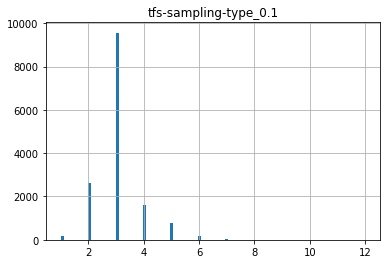

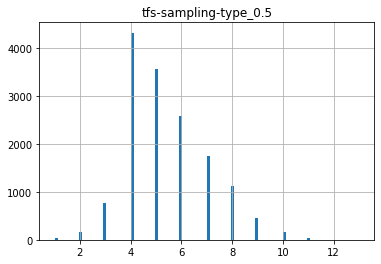

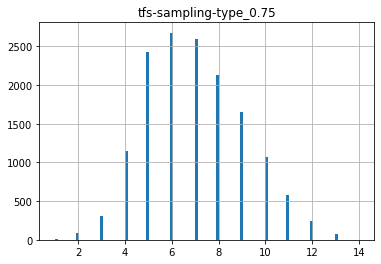

In [96]:
for c in tail_cdf_df_ranking.columns: 
    
    tail_cdf_df_ranking[c].hist(bins=100)
    plt.title(c)
    plt.show()